# 휴대폰 브랜드 이탈 고객 조사 - 머신러닝 훈련

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [3]:
# 폰트 한글화 세팅

# # window font setting
# font_path = 'C:/Windows/Fonts/batang.ttc'           # 한글 폰트를 적용하여 시각화

# # PJE font setting
# plt.rcParams['font.family'] = 'Malgun Gothic' 

# mac font setting
font_path = '/Library/Fonts/Arial Unicode.ttf'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

### 컬럼명 정리 (21, 22, 23)

| 원본 컬럼명                     | 정리된 컬럼명        |
|---------------------------------|-------------------|
| 고객 고유 번호                | pid                 |
| 스마트폰 제조사                | brand               |
| 이메일                          | email               |
| 메신저                          | messenger           |
| 블로그                          | blog                |
| 클라우드                        | cloud               |
| 온라인 음성통화 여부               | call_check          |
| 년간 서비스 구매 이용 채널          | service_purchase    |
| 모바일 간편 송금                  | money_transfer      |
| 신용카드 저장 (모바일에 신용카드 저장) | credit_card       |
| 통신사 가격                      | agency_purchase     |
| 기기 가격                       | machine_purchase    |
| 가격 부담(부모 or 자신)           | phone_owner         |
| 스마트폰 구분 (데이터 구별)      | data                |
| 스마트폰 DMB 기능             | dmb                 |
| 스마트폰 통신사                | agency              |
| 음성 무제한 서비스 유무        | voice_service       |
| 데이터 무제한 서비스 유무      | data_service        |
| 스마트폰 사용 기간             | use_date            |
| 나이                        | age                 |
| 최종 학력 (학교별로 0~6)        | school              |
| 혼인 유무 (1~4)              | marry               |
| 월평균 소득 (평균 소득 1~18)    | salary              |
| 직업 유무 (직업 유무)          | job                 |
| 종교 유무 (종교 유무)          | religion            |

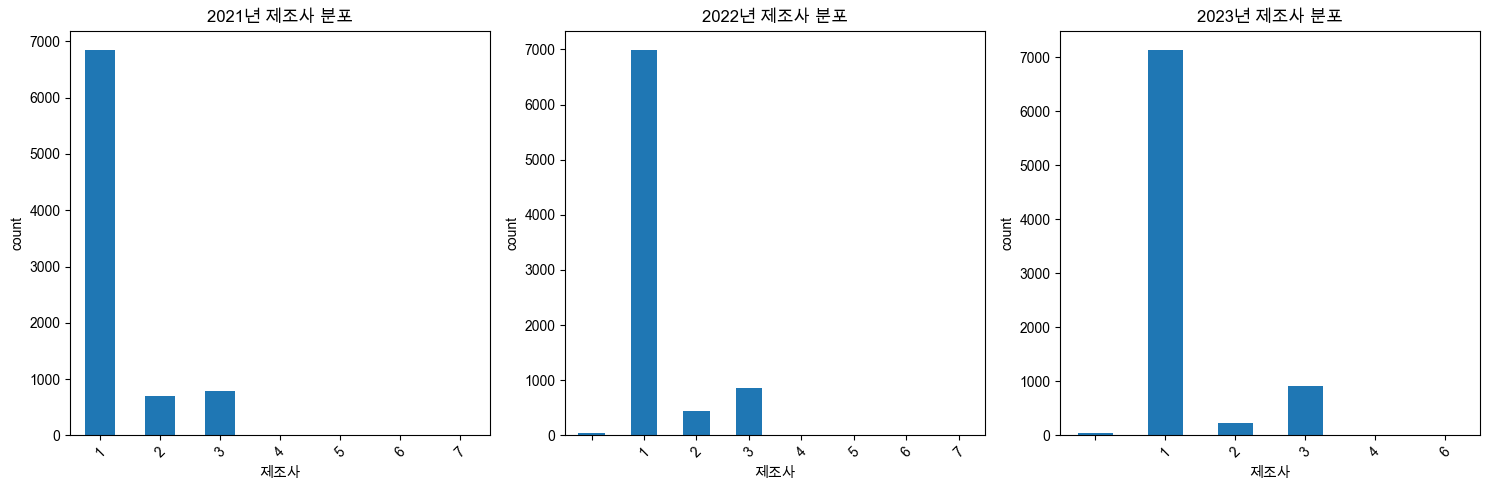

In [4]:
# 시각화 자료로 년도별 제조사 확인

# CSV 파일 읽기
phone_df = pd.read_csv('./data/phone_information.csv', low_memory=False)


# 서브플롯 생성
plt.figure(figsize=(15, 5))

# 2021년 데이터
plt.subplot(1, 3, 1)
phone_df['brand_21'].value_counts().sort_index().plot(kind='bar')
plt.title('2021년 제조사 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=45)

# 2022년 데이터
plt.subplot(1, 3, 2)
phone_df['brand_22'].value_counts().sort_index().plot(kind='bar')
plt.title('2022년 제조사 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=45)

# 2023년 데이터
plt.subplot(1, 3, 3)
phone_df['brand_23'].value_counts().sort_index().plot(kind='bar')
plt.title('2023년 제조사 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

###  데이터 형변환

In [5]:
# # 데이터 값을 unique로 찍어본 결과 str로 들어가있는 데이터가 있어 int로 형변환 해주어야 함
# print(phone_df['brand_21'].unique())
# print(phone_df['brand_22'].unique())
# print(phone_df['brand_23'].unique())
# print(phone_df['money_transfer_21'].unique())

# object 타입인 컬럼들 찾기
object_columns = phone_df.select_dtypes(include=['object']).columns

# object 타입 컬럼들을 숫자형으로 변환
for col in object_columns:
    phone_df.loc[:, col] = pd.to_numeric(phone_df[col], errors='coerce').astype('Int64')

# 변환된 컬럼 수 확인
print(f"\n변환된 컬럼 수: {len(object_columns)}개")
print("변환된 컬럼:", list(object_columns))


변환된 컬럼 수: 31개
변환된 컬럼: ['service_purchase_21', 'money_transfer_21', 'cradit_card_21', 'call_check_22', 'service_purchase_22', 'money_transfer_22', 'cradit_card_22', 'agency_purchase_22', 'machine_purchase_22', 'phone_owner_22', 'data_22', 'dmb_22', 'agency_22', 'voice_service_22', 'data_service_22', 'use_date_22', 'brand_22', 'call_check_23', 'service_purchase_23', 'money_transfer_23', 'cradit_card_23', 'agency_purchase_23', 'machine_purchase_23', 'phone_owner_23', 'data_23', 'dmb_23', 'agency_23', 'voice_service_23', 'data_service_23', 'use_date_23', 'brand_23']


### 값이 없는 데이터 제거

In [6]:
print(phone_df['age_21'].value_counts())
print(phone_df['service_purchase_21'].value_counts())

age_21
6    1836
5    1593
7    1314
3    1073
8     909
2     819
4     754
1      44
Name: count, dtype: int64
service_purchase_21
1    3577
7    2088
2    1100
6     800
8     256
5     164
4     142
9       1
Name: count, dtype: int64


In [7]:
# NA값이 있는 컬럼들 확인

na_columns = phone_df.columns[phone_df.isna().any()].tolist()
print("NA가 있는 컬럼들:")
for col in na_columns:
    na_count = phone_df[col].isna().sum()
    print(f"{col}: {na_count}개의 NA")
    print()

print("\n전체 NA 제거 전 데이터 크기:", phone_df.shape)

# 방법 1: NA가 있는 행을 모두 제거
phone_df = phone_df.dropna()
print("\n전체 NA 제거 후 데이터 크기:", phone_df.shape)
print(phone_df['call_check_22'].unique())

NA가 있는 컬럼들:
service_purchase_21: 214개의 NA

money_transfer_21: 214개의 NA

cradit_card_21: 214개의 NA

call_check_22: 45개의 NA

service_purchase_22: 149개의 NA

money_transfer_22: 149개의 NA

cradit_card_22: 149개의 NA

agency_purchase_22: 5개의 NA

machine_purchase_22: 5개의 NA

phone_owner_22: 5개의 NA

data_22: 45개의 NA

dmb_22: 45개의 NA

agency_22: 45개의 NA

voice_service_22: 45개의 NA

data_service_22: 45개의 NA

use_date_22: 45개의 NA

brand_22: 45개의 NA

call_check_23: 45개의 NA

service_purchase_23: 85개의 NA

money_transfer_23: 85개의 NA

cradit_card_23: 85개의 NA

agency_purchase_23: 4개의 NA

machine_purchase_23: 4개의 NA

phone_owner_23: 4개의 NA

data_23: 45개의 NA

dmb_23: 45개의 NA

agency_23: 45개의 NA

voice_service_23: 45개의 NA

data_service_23: 45개의 NA

use_date_23: 45개의 NA

brand_23: 45개의 NA


전체 NA 제거 전 데이터 크기: (8342, 73)

전체 NA 제거 후 데이터 크기: (8071, 73)
[2 1]


In [8]:
# 3년간 삼성을 쓰지 않는 고객 제거

phone_df = phone_df[(phone_df['brand_21'] == 1) | 
                    (phone_df['brand_22'] == 1) ]

print("\n삼성을 쓰지 않는 사람 제거 후 데이터 크기:", phone_df.shape)


삼성을 쓰지 않는 사람 제거 후 데이터 크기: (7324, 73)


In [9]:
# 2022 이탈자 컬럼 생성

# 이탈자 식별
churned_customers = phone_df[
   (phone_df['brand_21'] == 1) & 
   (phone_df['brand_22'] != 1)
]

# 이탈자들의 21년도 데이터만 선택하고 컬럼명에 're_' 접두사 추가
churn_features = [col for col in phone_df.columns if '21' in col]
renamed_features = {col: f're_{col}' for col in churn_features}

churned_data = churned_customers[churn_features].rename(columns=renamed_features)

# 원본 데이터에 이탈자 데이터 병합
# 이탈자가 아닌 경우는 NaN으로 채워짐
phone_df_with_churn = pd.merge(
   phone_df, 
   churned_data,
   left_index=True,
   right_index=True,
   how='left'
)

# 새로 추가된 컬럼 확인
new_columns = [col for col in phone_df_with_churn.columns if 're_' in col]
print("추가된 이탈자 특성 컬럼:", len(new_columns))
print(new_columns)

추가된 이탈자 특성 컬럼: 24
['re_email_21', 're_messenger_21', 're_blog_21', 're_cloud_21', 're_call_check_21', 're_service_purchase_21', 're_money_transfer_21', 're_cradit_card_21', 're_agency_purchase_21', 're_machine_purchase_21', 're_phone_owner_21', 're_data_21', 're_dmb_21', 're_agency_21', 're_voice_service_21', 're_data_service_21', 're_use_date_21', 're_brand_21', 're_age_21', 're_school_21', 're_marry_21', 're_salary_21', 're_job_21', 're_religion_21']


In [10]:
# 2023 이탈자 컬럼 생성

# 이탈자 식별
churned_customers = phone_df[
   (phone_df['brand_22'] == 1) & 
   (phone_df['brand_23'] != 1)
]

# 이탈자들의 22년도 데이터만 선택하고 컬럼명에 're_' 접두사 추가
churn_features = [col for col in phone_df.columns if '22' in col]
renamed_features = {col: f're_{col}' for col in churn_features}

churned_data = churned_customers[churn_features].rename(columns=renamed_features)

# 원본 데이터에 이탈자 데이터 병합
# 이탈자가 아닌 경우는 NaN으로 채워짐
phone_df_with_churn = pd.merge(
   phone_df, 
   churned_data,
   left_index=True,
   right_index=True,
   how='left'
)

# 새로 추가된 컬럼 확인
new_columns = [col for col in phone_df_with_churn.columns if 're_' in col]
print("추가된 이탈자 특성 컬럼:", len(new_columns))
print(new_columns)

추가된 이탈자 특성 컬럼: 24
['re_email_22', 're_messenger_22', 're_blog_22', 're_cloud_22', 're_call_check_22', 're_service_purchase_22', 're_money_transfer_22', 're_cradit_card_22', 're_agency_purchase_22', 're_machine_purchase_22', 're_phone_owner_22', 're_data_22', 're_dmb_22', 're_agency_22', 're_voice_service_22', 're_data_service_22', 're_use_date_22', 're_brand_22', 're_age_22', 're_school_22', 're_marry_22', 're_salary_22', 're_job_22', 're_religion_22']


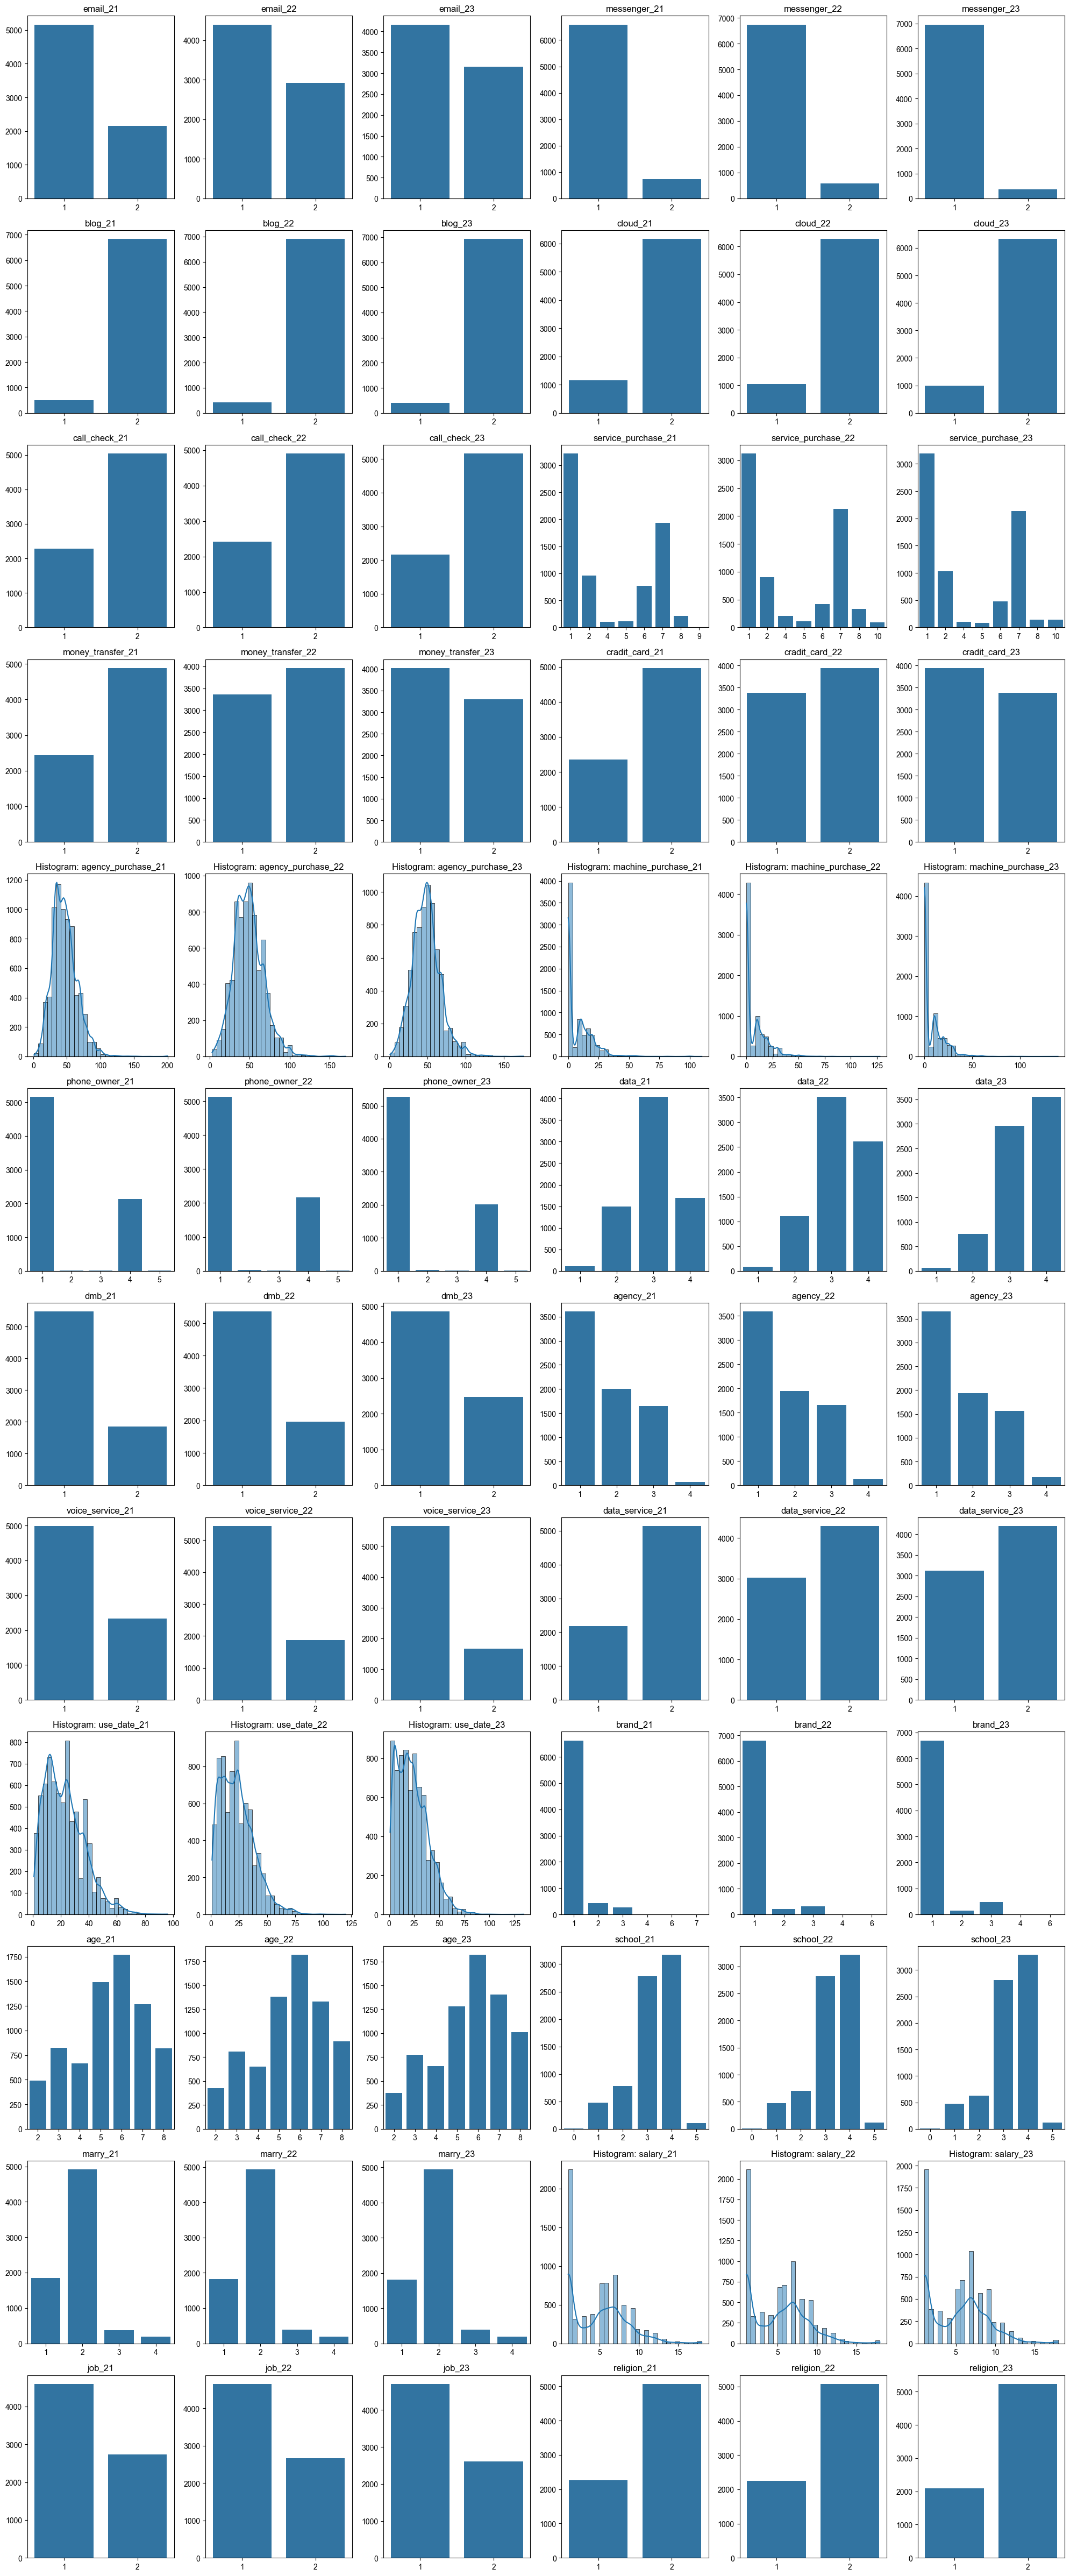

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 확인할 변수 리스트
selected_cols = [
    'email_21', 'email_22', 'email_23',
    'messenger_21', 'messenger_22', 'messenger_23',
    'blog_21', 'blog_22', 'blog_23',
    'cloud_21', 'cloud_22', 'cloud_23',
    'call_check_21', 'call_check_22', 'call_check_23',
    'service_purchase_21', 'service_purchase_22', 'service_purchase_23',
    'money_transfer_21', 'money_transfer_22', 'money_transfer_23',
    'cradit_card_21', 'cradit_card_22', 'cradit_card_23',
    'agency_purchase_21', 'agency_purchase_22', 'agency_purchase_23',
    'machine_purchase_21', 'machine_purchase_22', 'machine_purchase_23',
    'phone_owner_21', 'phone_owner_22', 'phone_owner_23',
    'data_21', 'data_22', 'data_23',
    'dmb_21', 'dmb_22', 'dmb_23',
    'agency_21', 'agency_22', 'agency_23',
    'voice_service_21', 'voice_service_22', 'voice_service_23',
    'data_service_21', 'data_service_22', 'data_service_23',
    'use_date_21', 'use_date_22', 'use_date_23',
    'brand_21', 'brand_22', 'brand_23',
    'age_21', 'age_22', 'age_23',
    'school_21', 'school_22', 'school_23',
    'marry_21', 'marry_22', 'marry_23',
    'salary_21', 'salary_22', 'salary_23',
    'job_21', 'job_22', 'job_23',
    'religion_21', 'religion_22', 'religion_23'
]


# 그래프 크기 설정
n_cols = 6  # 한 줄에 4개씩 출력
n_rows = (len(selected_cols) + n_cols - 1) // n_cols  # 총 행 개수

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))

# 변수별 그래프 그리기
for i, col in enumerate(selected_cols):
    ax = axes[i // n_cols, i % n_cols]  # 현재 subplot 위치
    
    if phone_df[col].nunique() > 10:  # 연속형 변수 (고유값 10개 초과)
        sns.histplot(phone_df[col], kde=True, bins=30, ax=ax)
        ax.set_title(f"Histogram: {col}")
    else:  # 범주형 변수 (고유값 10개 이하)
        sns.countplot(x=phone_df[col], ax=ax)
        ax.set_title(f"{col}")
    
    ax.set_xlabel("")  # x축 라벨 제거
    ax.set_ylabel("")

# 불필요한 빈 서브플롯 제거
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

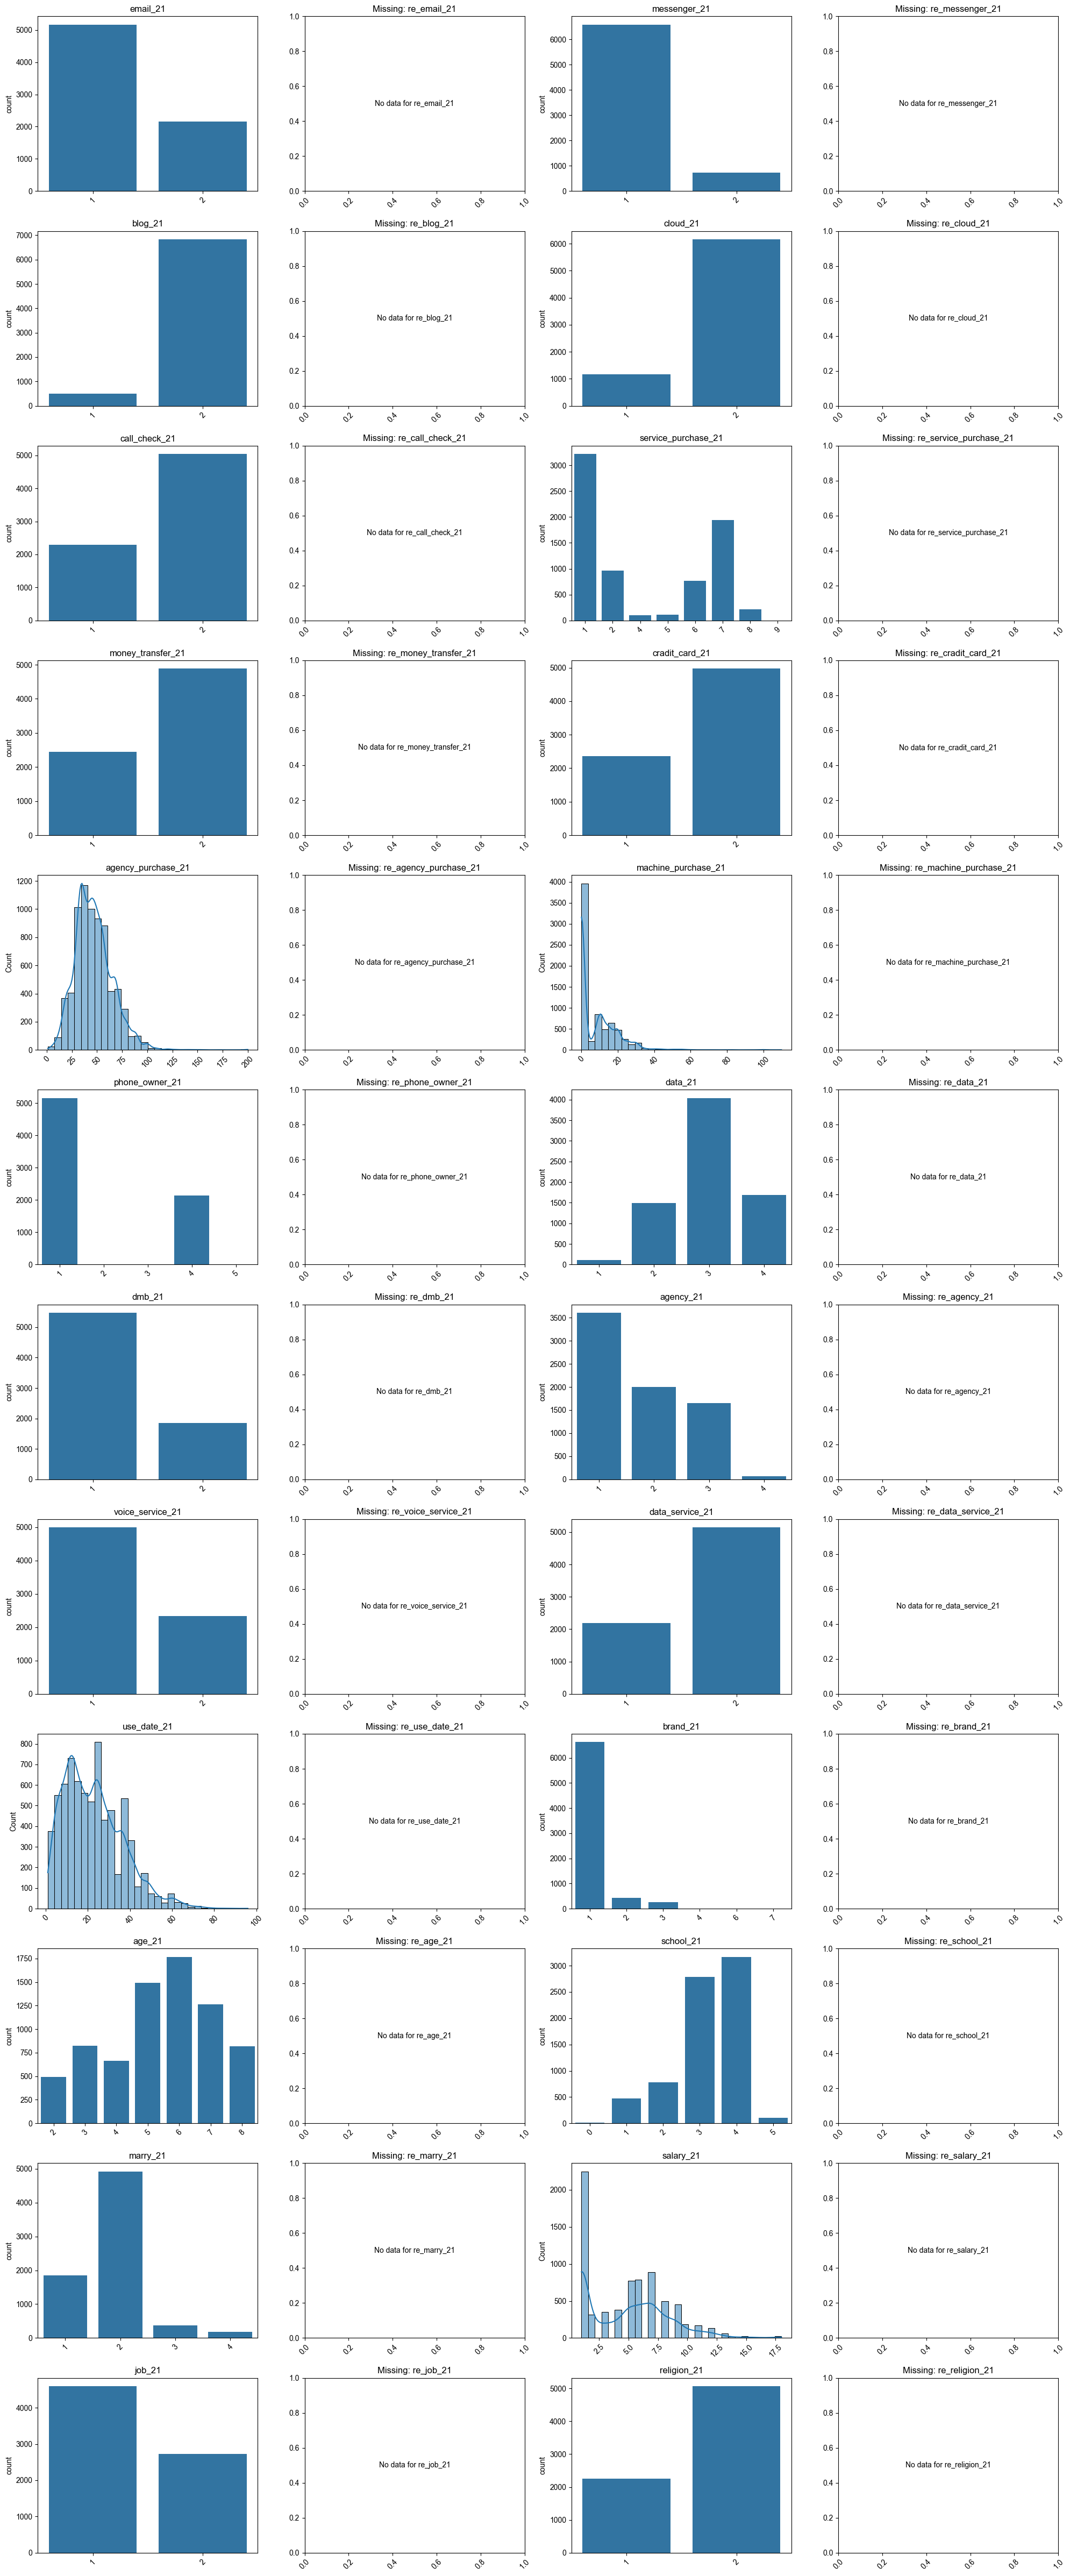

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# phone_df 대신 phone_df_with_churn 사용
df = phone_df_with_churn  # 병합된 데이터프레임 사용

# 확인할 변수 리스트
selected_cols = [
    'email_21','re_email_21',
    'messenger_21', 're_messenger_21',
    'blog_21', 're_blog_21',
    'cloud_21', 're_cloud_21',
    'call_check_21', 're_call_check_21',
    'service_purchase_21', 're_service_purchase_21',
    'money_transfer_21', 're_money_transfer_21',
    'cradit_card_21', 're_cradit_card_21',
    'agency_purchase_21', 're_agency_purchase_21',
    'machine_purchase_21', 're_machine_purchase_21',
    'phone_owner_21', 're_phone_owner_21',
    'data_21', 're_data_21',
    'dmb_21', 're_dmb_21',
    'agency_21', 're_agency_21',
    'voice_service_21', 're_voice_service_21',
    'data_service_21', 're_data_service_21',
    'use_date_21', 're_use_date_21',
    'brand_21', 're_brand_21',
    'age_21', 're_age_21',
    'school_21', 're_school_21',
    'marry_21', 're_marry_21',
    'salary_21', 're_salary_21',
    'job_21', 're_job_21',
    'religion_21', 're_religion_21',
]

# 그래프 크기 설정
n_cols = 4
n_rows = (len(selected_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))

# 변수별 그래프 그리기
for i, col in enumerate(selected_cols):
    ax = axes[i // n_cols, i % n_cols]
    
    if col in df.columns:  # 컬럼이 존재하는지 확인
        if df[col].nunique() > 10:
            sns.histplot(data=df, x=col, kde=True, bins=30, ax=ax)
        else:
            sns.countplot(data=df, x=col, ax=ax)
        ax.set_title(f"{col}")
    else:
        ax.text(0.5, 0.5, f"No data for {col}", ha='center', va='center')
        ax.set_title(f"Missing: {col}")
    
    ax.set_xlabel("")
    ax.tick_params(axis='x', rotation=45)  # x축 라벨 회전

# 불필요한 빈 서브플롯 제거
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

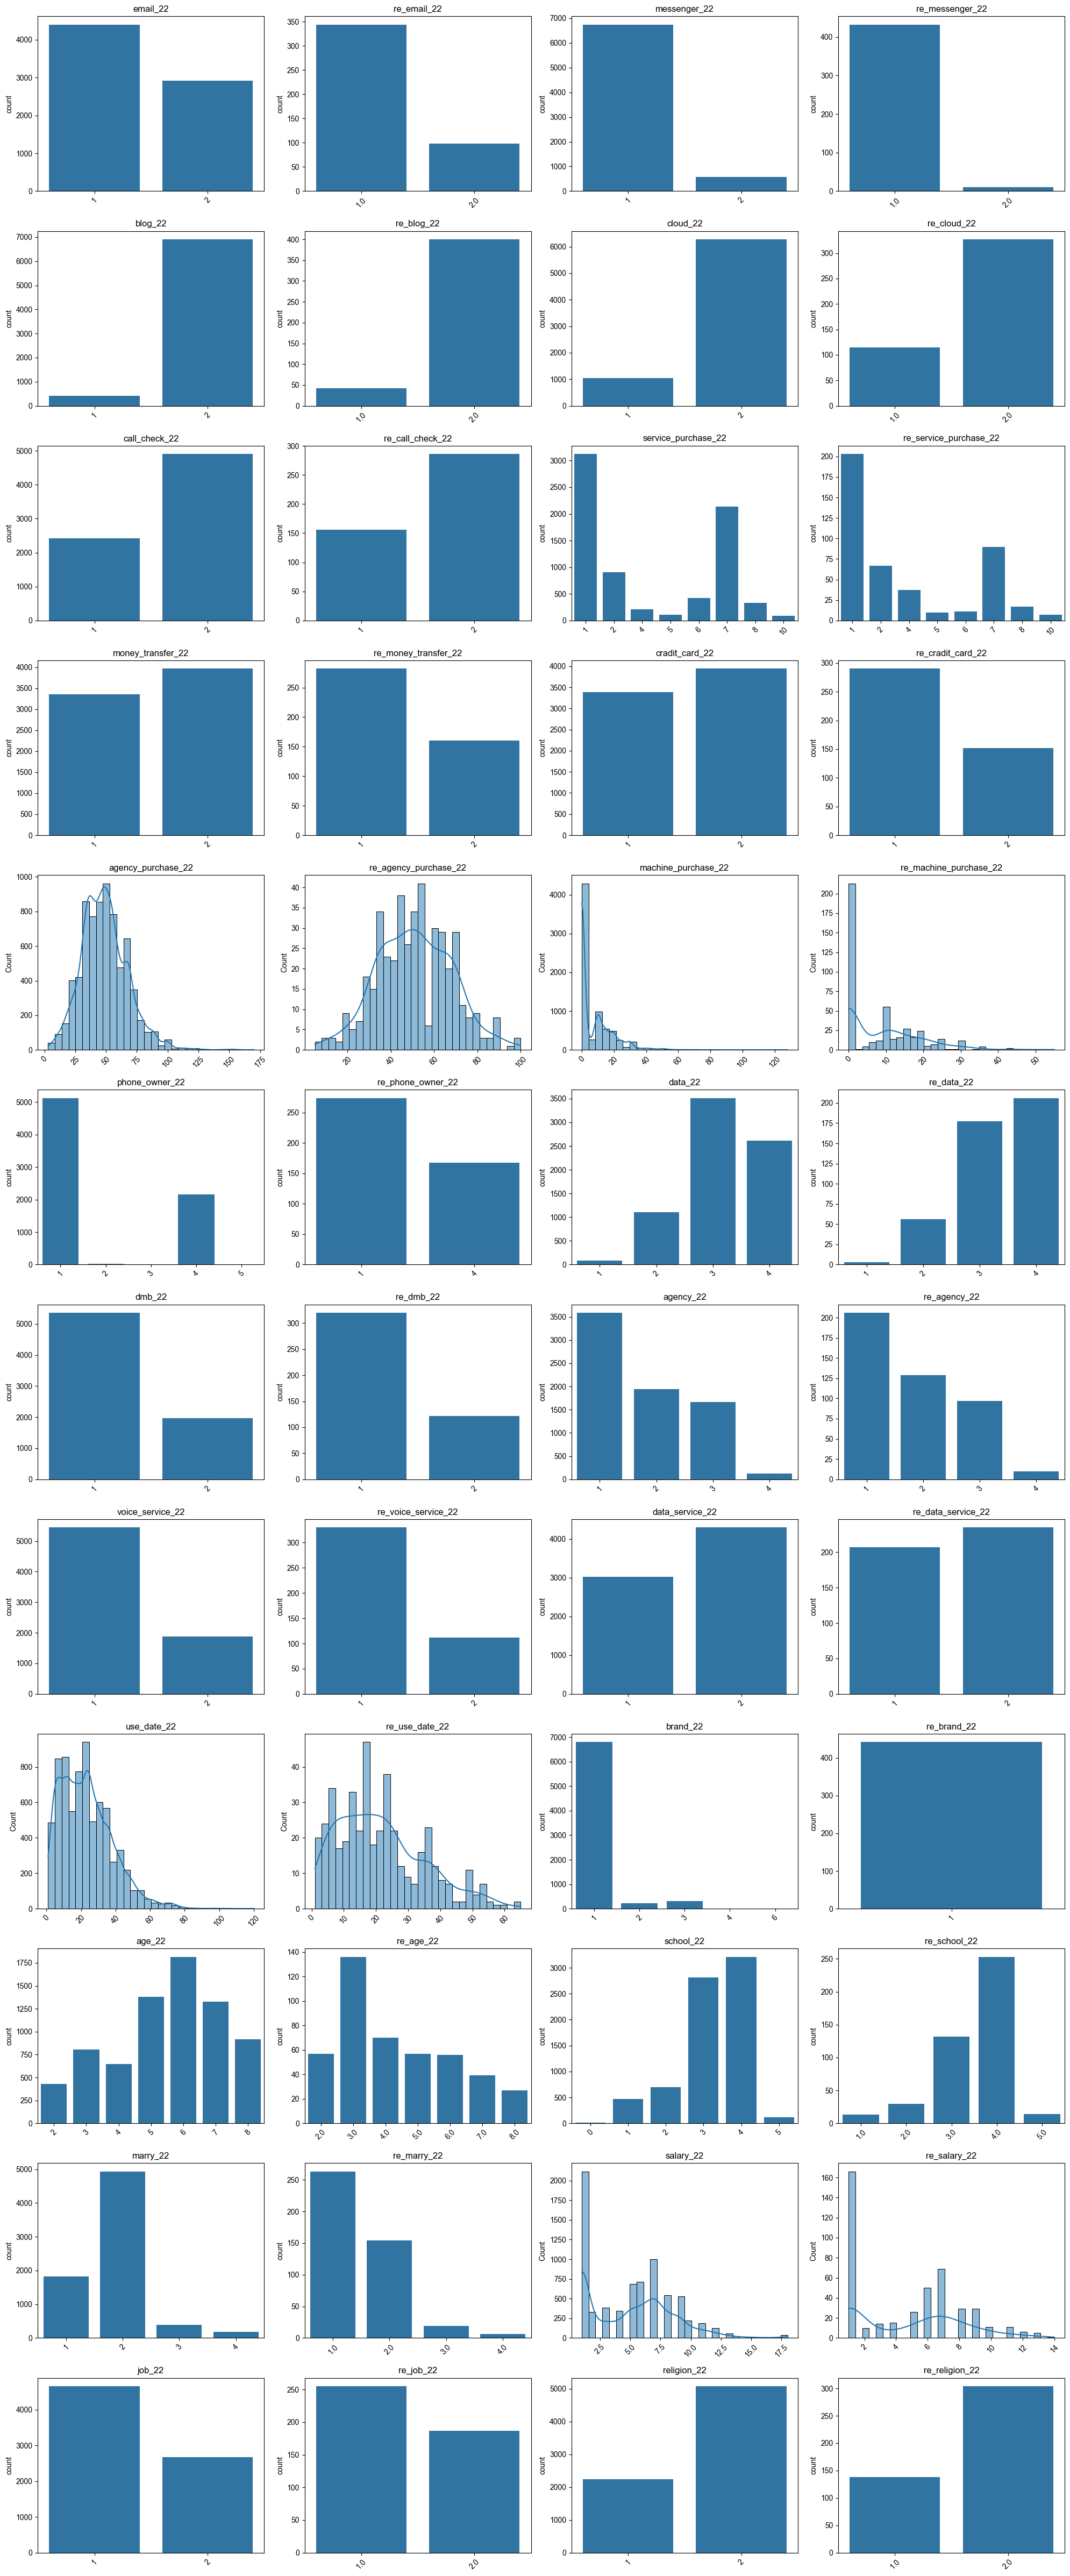

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# phone_df 대신 phone_df_with_churn 사용
df = phone_df_with_churn  # 병합된 데이터프레임 사용

# 확인할 변수 리스트
selected_cols = [
    'email_22','re_email_22',
    'messenger_22', 're_messenger_22',
    'blog_22', 're_blog_22',
    'cloud_22', 're_cloud_22',
    'call_check_22', 're_call_check_22',
    'service_purchase_22', 're_service_purchase_22',
    'money_transfer_22', 're_money_transfer_22',
    'cradit_card_22', 're_cradit_card_22',
    'agency_purchase_22', 're_agency_purchase_22',
    'machine_purchase_22', 're_machine_purchase_22',
    'phone_owner_22', 're_phone_owner_22',
    'data_22', 're_data_22',
    'dmb_22', 're_dmb_22',
    'agency_22', 're_agency_22',
    'voice_service_22', 're_voice_service_22',
    'data_service_22', 're_data_service_22',
    'use_date_22', 're_use_date_22',
    'brand_22', 're_brand_22',
    'age_22', 're_age_22',
    'school_22', 're_school_22',
    'marry_22', 're_marry_22',
    'salary_22', 're_salary_22',
    'job_22', 're_job_22',
    'religion_22', 're_religion_22',
]

# 그래프 크기 설정
n_cols = 4
n_rows = (len(selected_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))

# 변수별 그래프 그리기
for i, col in enumerate(selected_cols):
    ax = axes[i // n_cols, i % n_cols]
    
    if col in df.columns:  # 컬럼이 존재하는지 확인
        if df[col].nunique() > 10:
            sns.histplot(data=df, x=col, kde=True, bins=30, ax=ax)
        else:
            sns.countplot(data=df, x=col, ax=ax)
        ax.set_title(f"{col}")
    else:
        ax.text(0.5, 0.5, f"No data for {col}", ha='center', va='center')
        ax.set_title(f"Missing: {col}")
    
    ax.set_xlabel("")
    ax.tick_params(axis='x', rotation=45)  # x축 라벨 회전

# 불필요한 빈 서브플롯 제거
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [14]:
print(phone_df[phone_df['age_21'] == 1])

Empty DataFrame
Columns: [pid, email_21, messenger_21, blog_21, cloud_21, call_check_21, service_purchase_21, money_transfer_21, cradit_card_21, agency_purchase_21, machine_purchase_21, phone_owner_21, data_21, dmb_21, agency_21, voice_service_21, data_service_21, use_date_21, brand_21, age_21, school_21, marry_21, salary_21, job_21, religion_21, email_22, messenger_22, blog_22, cloud_22, call_check_22, service_purchase_22, money_transfer_22, cradit_card_22, agency_purchase_22, machine_purchase_22, phone_owner_22, data_22, dmb_22, agency_22, voice_service_22, data_service_22, use_date_22, brand_22, age_22, school_22, marry_22, salary_22, job_22, religion_22, email_23, messenger_23, blog_23, cloud_23, call_check_23, service_purchase_23, money_transfer_23, cradit_card_23, agency_purchase_23, machine_purchase_23, phone_owner_23, data_23, dmb_23, agency_23, voice_service_23, data_service_23, use_date_23, brand_23, age_23, school_23, marry_23, salary_23, job_23, religion_23]
Index: []

[0 r

###  2021 -> 2022 (이탈자)
###  2022 -> 2023 (이탈자)

In [15]:
# 2022년도 이탈자

# 값 빼줌
samsung_users22 = phone_df[
   (phone_df['brand_21'] == 1)
]
changed_users22 = phone_df[
   (phone_df['brand_21'] == 1) & 
   (phone_df['brand_22'] != 1)
]

# 결과 확인
print("브랜드 변경 고객 수:", len(changed_users22))
print('2022 이탈률: ', (len(changed_users22) / len(samsung_users22)))
print("\n변경된 사례:")
print(changed_users22[['pid', 'brand_21', 'brand_22']])

# 어떤 브랜드로 변경되었는지 분포 확인
brand_change_22 = changed_users22['brand_22'].value_counts()
print("\n변경된 브랜드 분포:")
print(brand_change_22)


브랜드 변경 고객 수: 523
2022 이탈률:  0.0789433962264151

변경된 사례:
            pid  brand_21 brand_22
1         10002         1        3
72       440001         1        2
75       440004         1        2
95       550002         1        3
105      600005         1        3
...         ...       ...      ...
8215  116530001         1        3
8216  116530002         1        3
8225  116720002         1        2
8226  116720003         1        3
8227  116720004         1        3

[523 rows x 3 columns]

변경된 브랜드 분포:
brand_22
3    308
2    212
6      2
4      1
Name: count, dtype: int64


In [16]:
# 2023년도 이탈자

changed_users23 = phone_df[
   (phone_df['brand_22'] == 1) & 
   (phone_df['brand_23'] != 1)
]

samsung_users23 = phone_df[
   (phone_df['brand_22'] == 1) 
]

print('2022 이탈률: ', (len(changed_users23) / len(samsung_users23)))

# 결과 확인
print("브랜드 변경 고객 수:", len(changed_users23))
print("\n변경된 사례:")
print(changed_users23[['pid', 'brand_22', 'brand_23']])

# 어떤 브랜드로 변경되었는지 분포 확인
brand_change_23 = changed_users23['brand_23'].value_counts()
print("\n변경된 브랜드 분포:")
print(brand_change_23)



2022 이탈률:  0.06499044258197324
브랜드 변경 고객 수: 442

변경된 사례:
            pid brand_22 brand_23
19       100002        1        3
23       160001        1        2
39       300003        1        3
40       300004        1        3
43       310003        1        3
...         ...      ...      ...
8152  115890003        1        3
8156  115910004        1        3
8238  116990001        1        2
8242  117020001        1        2
8265  117300001        1        2

[442 rows x 3 columns]

변경된 브랜드 분포:
brand_23
3    329
2    106
4      4
6      3
Name: count, dtype: int64


In [17]:
# 2023년도 복귀자       ->     복귀자는 다시 생각해보겠지만 일단 이탈자만 생각하기로 함

returned_users = phone_df[
    (phone_df['brand_21'] == 1) &
   (phone_df['brand_22'] != 1) & 
   (phone_df['brand_23'] == 1)
]

# 결과 확인
print("브랜드 변경 고객 수:", len(returned_users))
print("\n변경된 사례:")
print(returned_users[['pid', 'brand_21', 'brand_22', 'brand_23']])

# 어떤 브랜드로 변경되었는지 분포 확인
brand_return_23 = returned_users['brand_23'].value_counts()
print("\n변경된 브랜드 분포:")
print(brand_return_23)

브랜드 변경 고객 수: 333

변경된 사례:
            pid  brand_21 brand_22 brand_23
1         10002         1        3        1
72       440001         1        2        1
75       440004         1        2        1
105      600005         1        3        1
107      620001         1        3        1
...         ...       ...      ...      ...
8098  115420002         1        2        1
8153  115910001         1        2        1
8215  116530001         1        3        1
8216  116530002         1        3        1
8225  116720002         1        2        1

[333 rows x 4 columns]

변경된 브랜드 분포:
brand_23
1    333
Name: count, dtype: int64


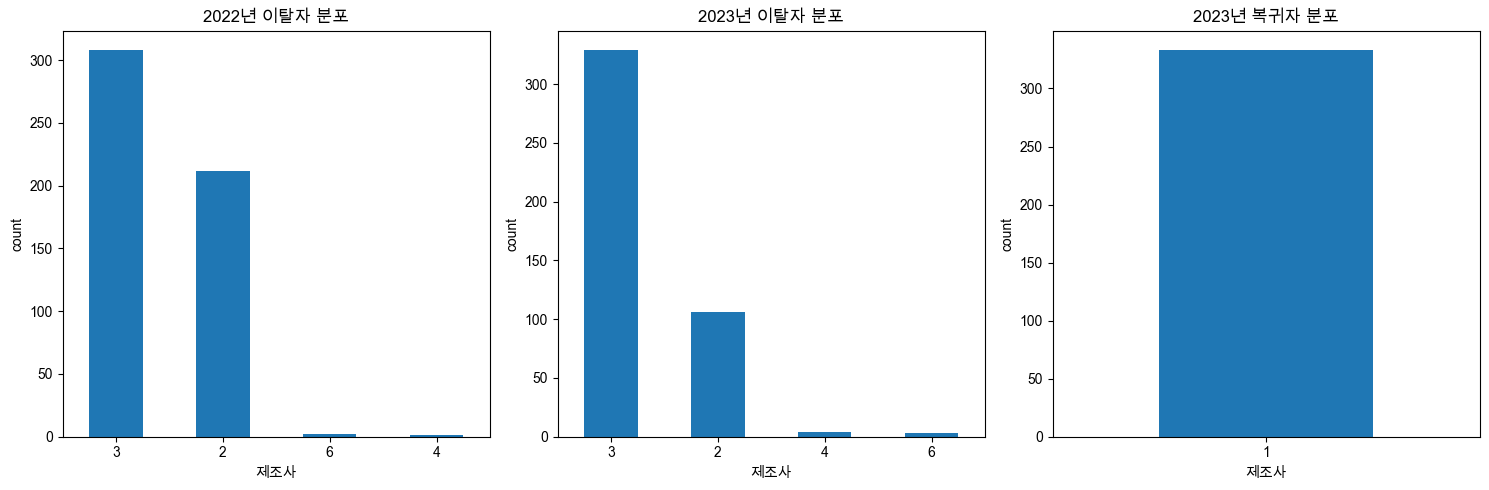

In [18]:
# 시각화 자료로 이탈자, 복귀자 확인

# 서브플롯 생성
plt.figure(figsize=(15, 5))

# 2021년 데이터
plt.subplot(1, 3, 1)
brand_change_22.plot(kind='bar')
plt.title('2022년 이탈자 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=0)

# 2022년 데이터
plt.subplot(1, 3, 2)
brand_change_23.plot(kind='bar')
plt.title('2023년 이탈자 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=0)

# 2023년 데이터
plt.subplot(1, 3, 3)
brand_return_23.plot(kind='bar')
plt.title('2023년 복귀자 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=0)

plt.tight_layout()

plt.show()


In [19]:
total_customer = phone_df['pid'].count()
print(f'전체 인원 수 :{total_customer}')

total_samsung_21 = phone_df[phone_df['brand_21'] == 1]['brand_21'].count()
print(f'21년도 삼성 인원 수 :{total_samsung_21}')

total_samsung_22 = phone_df[phone_df['brand_22'] == 1]['brand_22'].count()
print(f'22년도 삼성 인원 수 :{total_samsung_22}')

total_samsung_23 = phone_df[phone_df['brand_23'] == 1]['brand_23'].count()
print(f'23년도 삼성 인원 수 :{total_samsung_23}')

total_chaged = len(changed_users22) + len(changed_users23)

print(f'전체 이탈자 수 :{total_chaged}')

total_merged = phone_df[phone_df['brand_23'] == 1]['brand_23'].count() + total_chaged
print(f'이탈자를 포함한 총 고객 수 :{total_merged}')



전체 인원 수 :7324
21년도 삼성 인원 수 :6625
22년도 삼성 인원 수 :6801
23년도 삼성 인원 수 :6692
전체 이탈자 수 :965
이탈자를 포함한 총 고객 수 :7657


In [20]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 8341
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   pid                  7324 non-null   int64 
 1   email_21             7324 non-null   int64 
 2   messenger_21         7324 non-null   int64 
 3   blog_21              7324 non-null   int64 
 4   cloud_21             7324 non-null   int64 
 5   call_check_21        7324 non-null   int64 
 6   service_purchase_21  7324 non-null   object
 7   money_transfer_21    7324 non-null   object
 8   cradit_card_21       7324 non-null   object
 9   agency_purchase_21   7324 non-null   int64 
 10  machine_purchase_21  7324 non-null   int64 
 11  phone_owner_21       7324 non-null   int64 
 12  data_21              7324 non-null   int64 
 13  dmb_21               7324 non-null   int64 
 14  agency_21            7324 non-null   int64 
 15  voice_service_21     7324 non-null   int64 
 16  data_servic

In [21]:
phone_df.describe()

,pid,email_21,messenger_21,blog_21,cloud_21,call_check_21,agency_purchase_21,machine_purchase_21,phone_owner_21,data_21,...,email_23,messenger_23,blog_23,cloud_23,age_23,school_23,marry_23,salary_23,job_23,religion_23
count,7.324000e+03,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,...,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000
mean,4.959776e+07,1.295057,1.100355,1.932960,1.841480,1.688012,46.721737,7.801202,1.885582,2.999044,...,1.431049,1.048744,1.946068,1.863872,5.590524,3.260923,1.857728,5.311851,1.357182,1.714500
std,3.804781e+07,0.456100,0.300493,0.250108,0.365253,0.463337,18.528685,10.848381,1.368483,0.701240,...,0.495257,0.215347,0.225899,0.342948,1.699097,0.895493,0.618544,3.606020,0.479202,0.451683
min,1.000100e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1.610008e+07,1.000000,1.000000,2.000000,2.000000,1.000000,34.000000,0.000000,1.000000,3.000000,...,1.000000,1.000000,2.000000,2.000000,5.000000,3.000000,2.000000,1.000000,1.000000,1.000000
50%,5.049500e+07,1.000000,1.000000,2.000000,2.000000,2.000000,45.000000,0.000000,1.000000,3.000000,...,1.000000,1.000000,2.000000,2.000000,6.000000,3.000000,2.000000,6.000000,1.000000,2.000000
75%,6.923500e+07,2.000000,1.000000,2.000000,2.000000,2.000000,56.000000,14.000000,4.000000,3.000000,...,2.000000,1.000000,2.000000,2.000000,7.000000,4.000000,2.000000,8.000000,2.000000,2.000000
max,1.183300e+08,2.000000,2.000000,2.000000,2.000000,2.000000,200.000000,110.000000,5.000000,4.000000,...,2.000000,2.000000,2.000000,2.000000,8.000000,5.000000,4.000000,18.000000,2.000000,2.000000


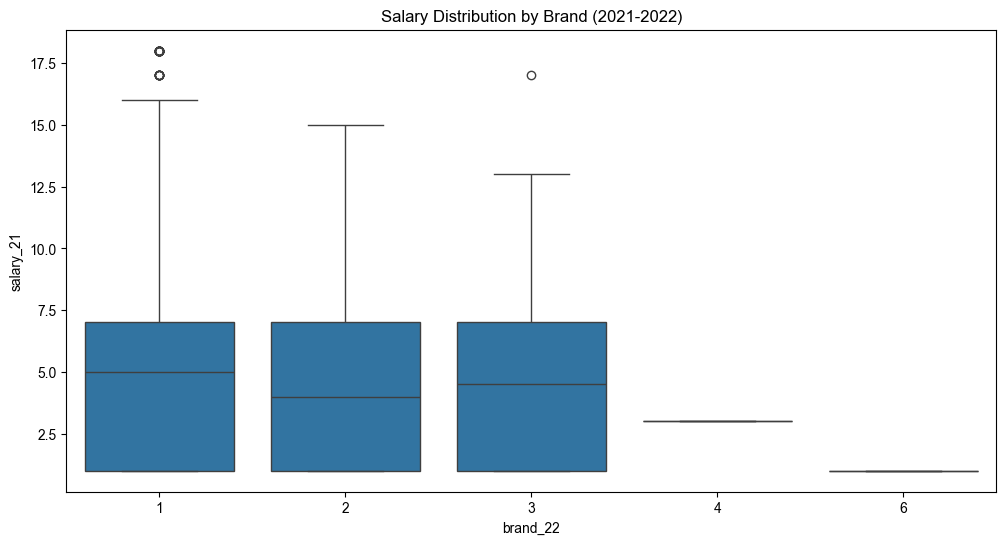

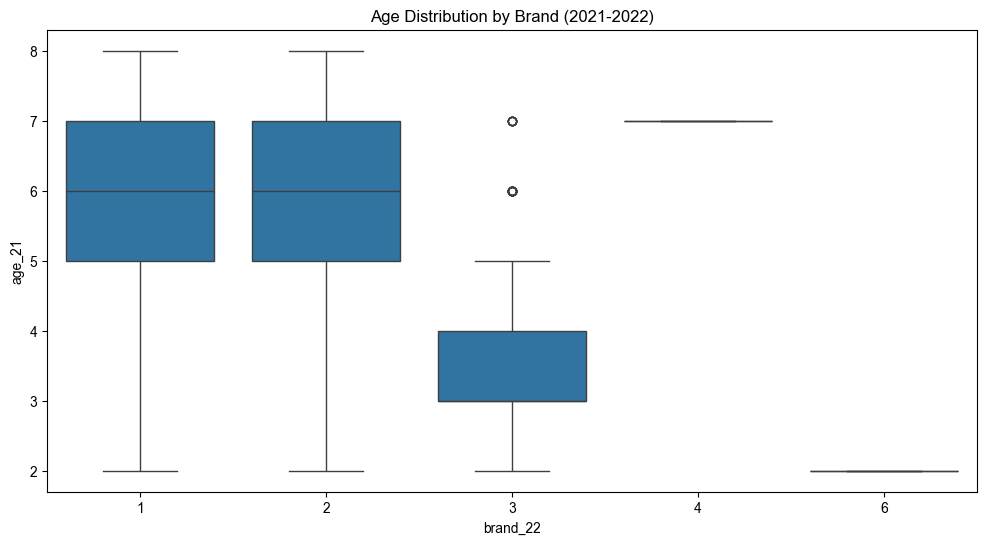

In [22]:
# 각 변수별 이탈 관계 분석 (예: salary와 이탈)
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand_22', y='salary_21', data=phone_df)
plt.title('Salary Distribution by Brand (2021-2022)')
plt.show()

# 연령대별 이탈 패턴
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand_22', y='age_21', data=phone_df)
plt.title('Age Distribution by Brand (2021-2022)')
plt.show()

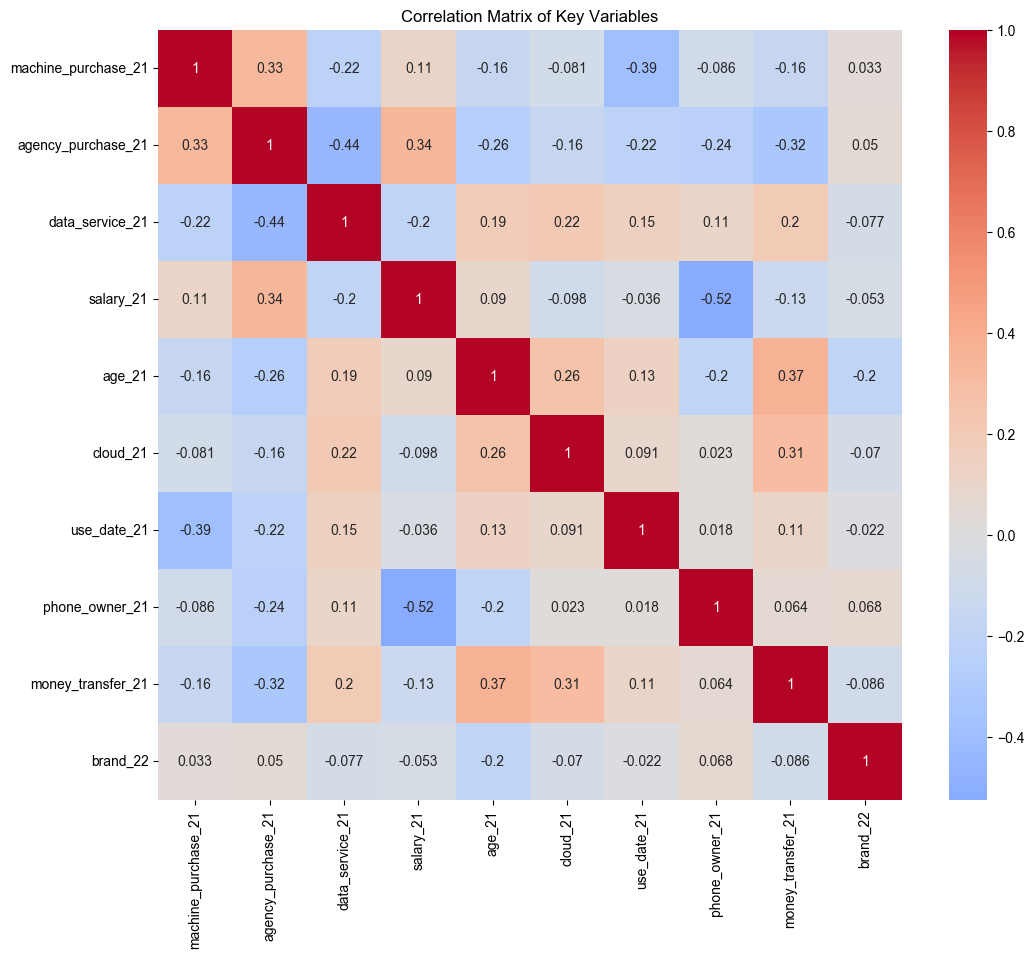

In [23]:
# 주요 변수들의 상관관계 분석
selected_columns = ['machine_purchase_21', 'agency_purchase_21', 'data_service_21', 
                   'salary_21', 'age_21', 'cloud_21', 'use_date_21', 
                   'phone_owner_21', 'money_transfer_21', 'brand_22']

correlation_matrix = phone_df[selected_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Key Variables')
plt.show()

<Figure size 1000x600 with 0 Axes>

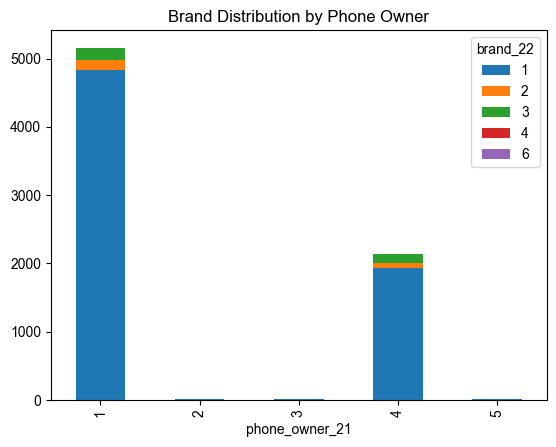

In [24]:
# 범주형 변수의 이탈 관계 분석 (예: phone_owner와 이탈)
plt.figure(figsize=(10, 6))
pd.crosstab(phone_df['phone_owner_21'], phone_df['brand_22']).plot(kind='bar', stacked=True)
plt.title('Brand Distribution by Phone Owner')
plt.show()

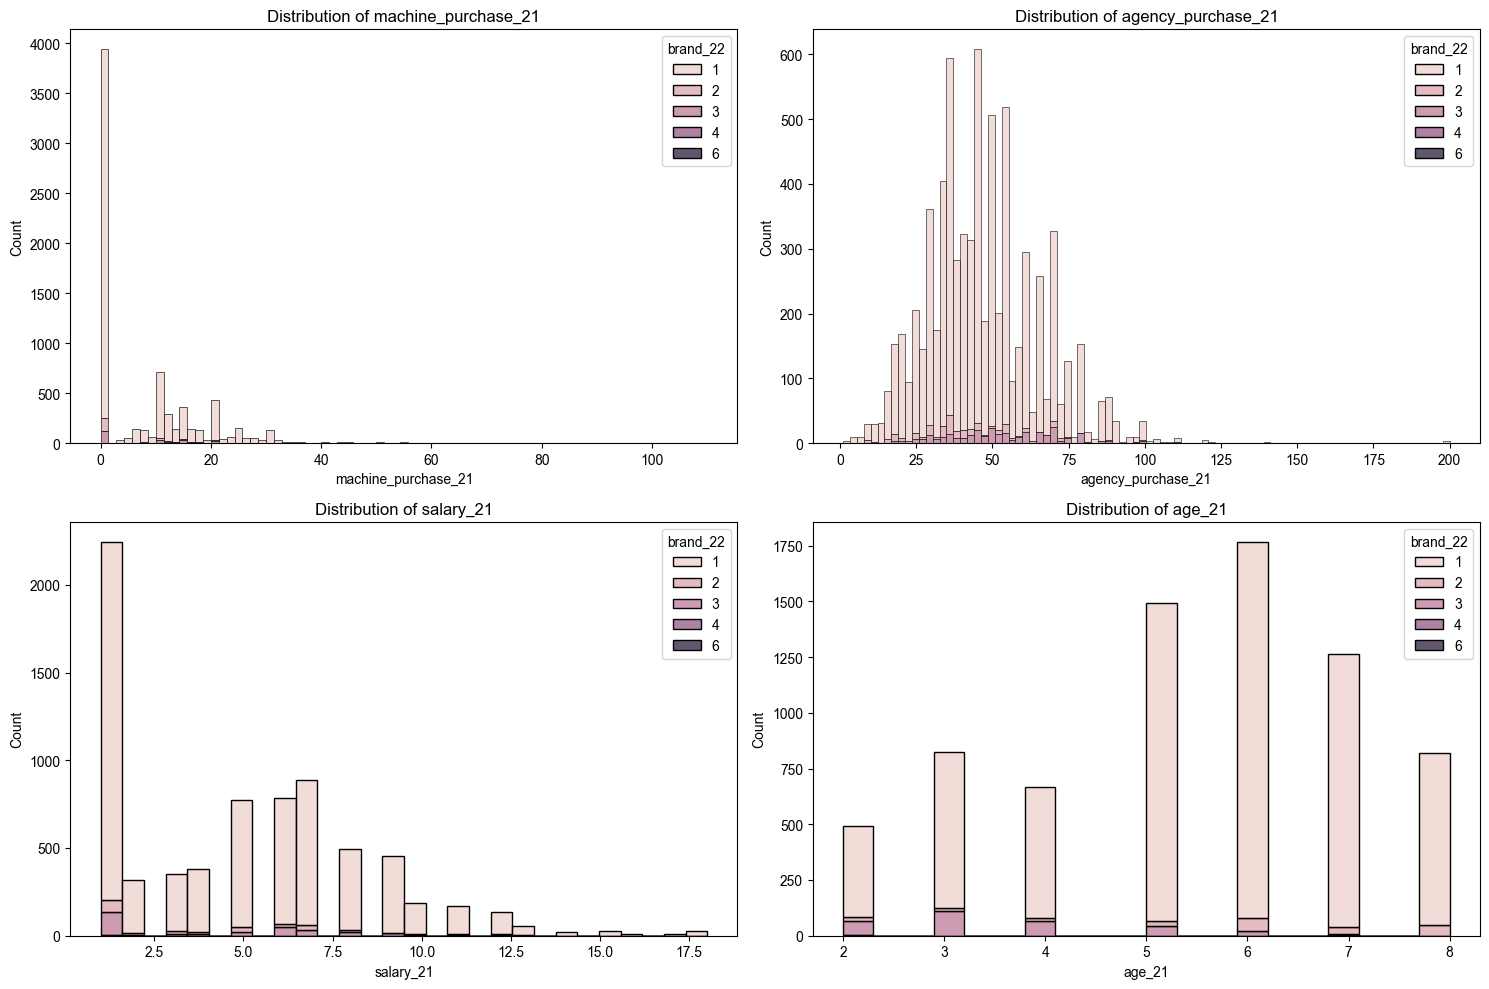

In [25]:
# 연속형 변수들의 분포 확인
plt.figure(figsize=(15, 10))

for i, col in enumerate(['machine_purchase_21', 'agency_purchase_21', 
                        'salary_21', 'age_21'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=phone_df, x=col, hue='brand_22', multiple="stack")
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

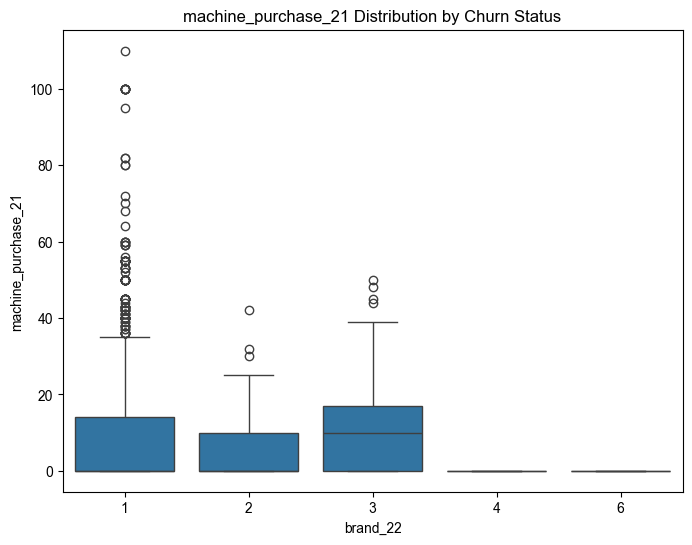

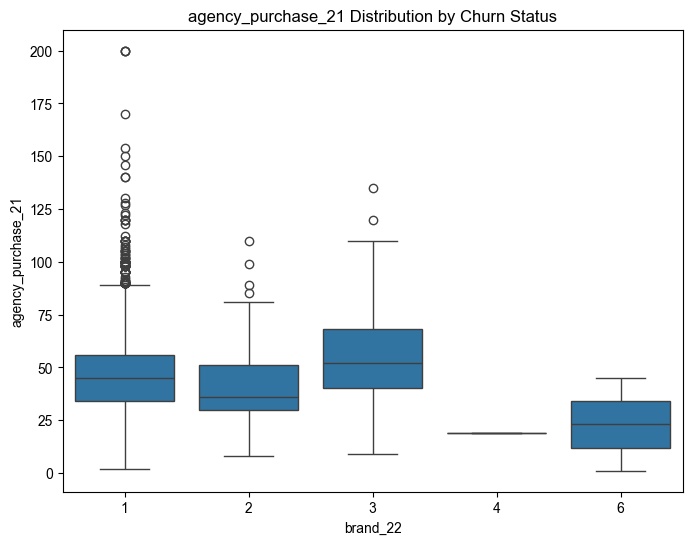

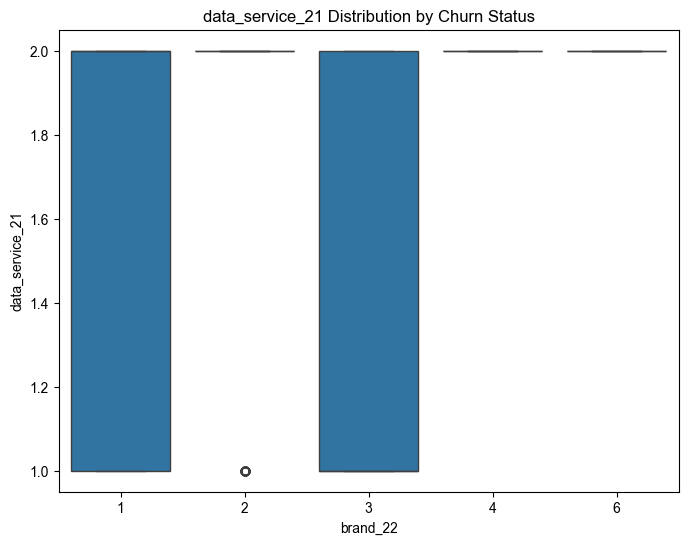

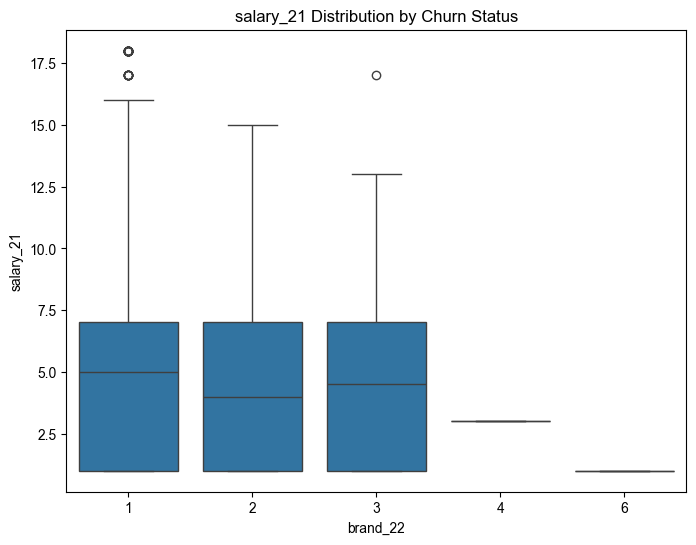

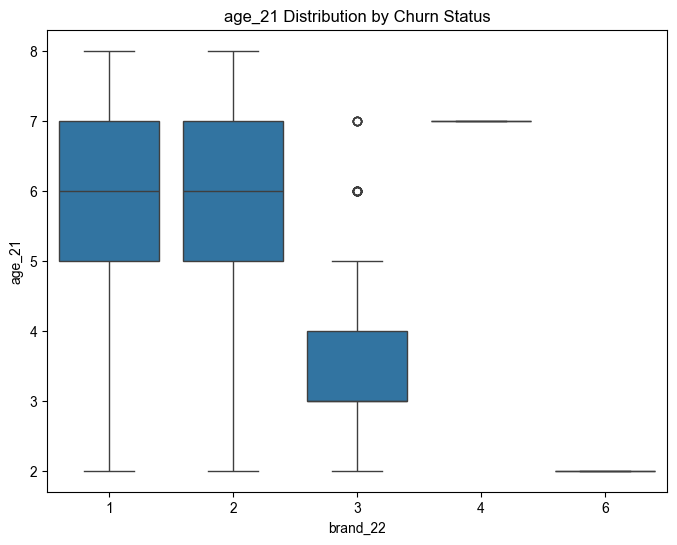

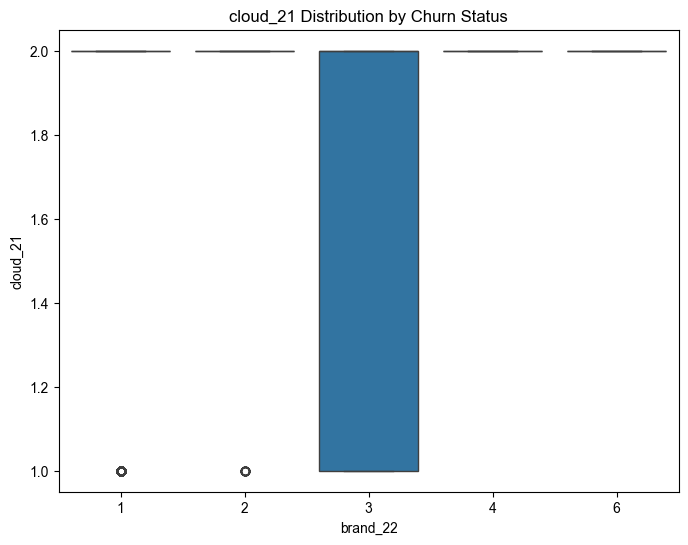

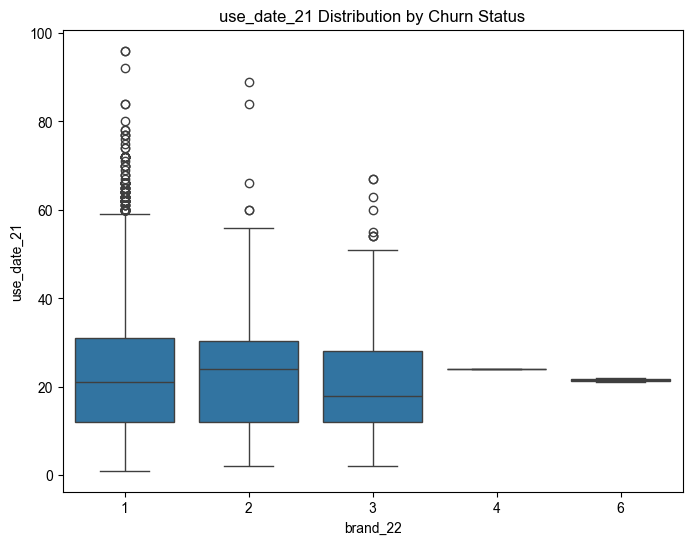

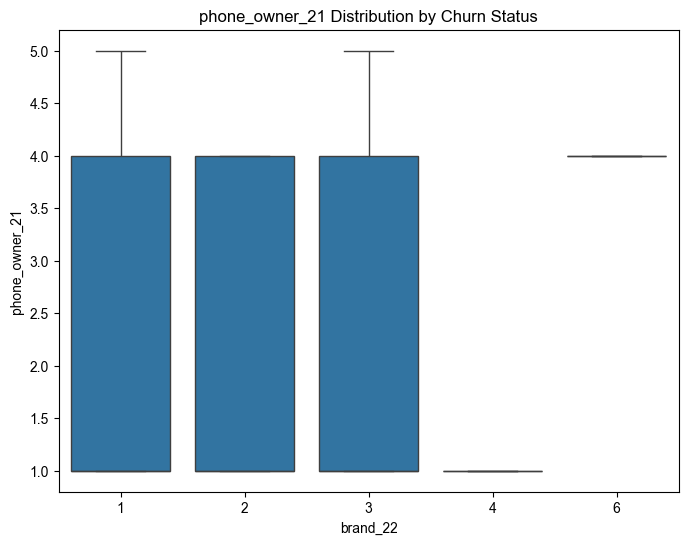

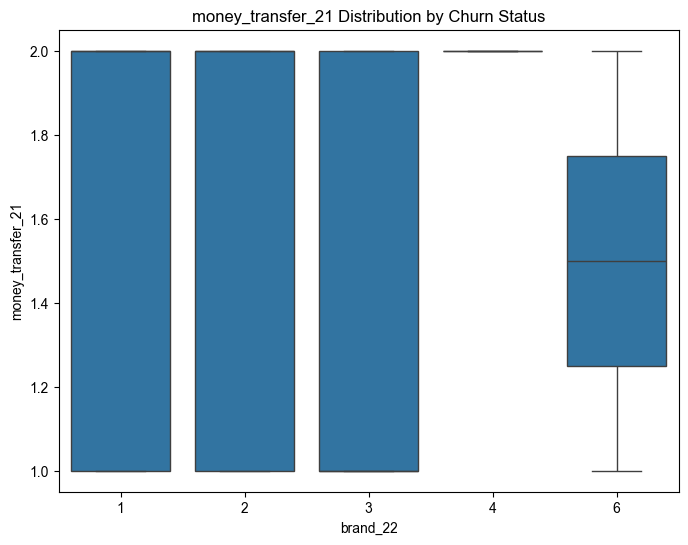

In [26]:
# 이탈 고객의 특성 분석
churn_customers = phone_df[phone_df['brand_22'] != phone_df['brand_21']]
non_churn_customers = phone_df[phone_df['brand_22'] == phone_df['brand_21']]

# 이탈 고객과 비이탈 고객의 특성 비교
for col in selected_columns[:-1]:  # brand_22 제외
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=phone_df, x='brand_22', y=col)
    plt.title(f'{col} Distribution by Churn Status')
    plt.show()

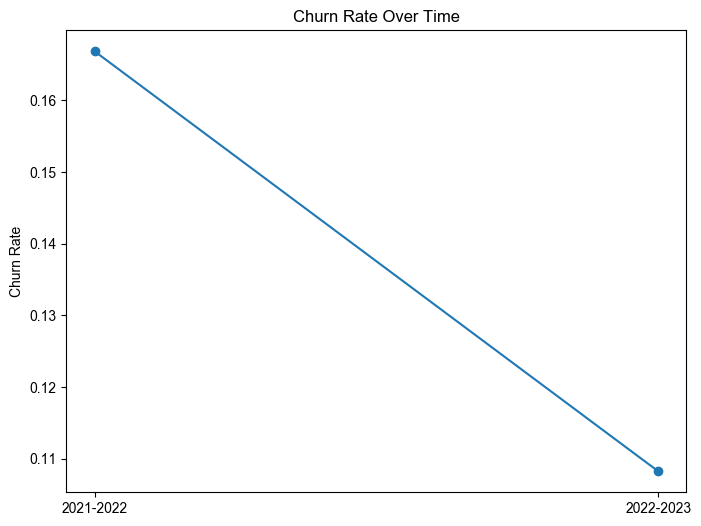

In [27]:
# 연도별 이탈률 변화
churn_rates = []
for year in [22, 23]:
    prev_year = year - 1
    churn_rate = len(phone_df[phone_df[f'brand_{year}'] != phone_df[f'brand_{prev_year}']]) / len(phone_df)
    churn_rates.append(churn_rate)

plt.figure(figsize=(8, 6))
plt.plot(['2021-2022', '2022-2023'], churn_rates, marker='o')
plt.title('Churn Rate Over Time')
plt.ylabel('Churn Rate')
plt.show()

실 데이터 훈련 수

- total_merged  이탈자를 합한 총 데이터
- total_chaged  이탈자 데이터
    - 이탈자의 총 비율 total_changed / totla_merged

---
### 이후에는 데이터를 가지고 각자 머신러닝 훈련

In [28]:
# machine_purchase (기기 가격)
# 고가/저가 기기 선택이 브랜드 충성도에 영향을 미칠 수 있음

# agency_purchase (통신사 가격)
# 통신요금이 기기 선택에 영향을 줄 수 있음

# data_service (데이터 무제한 서비스 유무)
# 데이터 서비스 만족도가 기기 선택에 영향을 미칠 수 있음

# salary (월평균 소득)
# 소득수준에 따른 기기 선택 경향 파악 가능

# age (나이)
# 연령대별 브랜드 선호도 차이 확인 가능

# cloud (클라우드 서비스 사용)
# 제조사의 생태계 서비스 활용도 확인

# service_purchase (서비스 구매 이용 채널)
# 구매 채널에 따른 브랜드 충성도 차이

# use_date (스마트폰 사용 기간)
# 기기 사용 기간과 브랜드 전환의 연관성

# phone_owner (가격 부담 주체: 부모 or 자신)
# 실구매자와 사용자의 차이가 브랜드 선택에 미치는 영향

# money_transfer (모바일 간편 송금)
# 모바일 금융 서비스 활용도와 브랜드 충성도의 관계 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


In [30]:
# 결측치 확인
print(phone_df['service_purchase_21'].value_counts())
print(phone_df['money_transfer_21'].value_counts())


service_purchase_21
1    3217
7    1937
2     963
6     771
8     215
5     116
4     104
9       1
Name: count, dtype: int64
money_transfer_21
2    4883
1    2441
Name: count, dtype: int64


Random Forest 성능:               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1353
           1       0.33      0.03      0.05       112

    accuracy                           0.92      1465
   macro avg       0.63      0.51      0.50      1465
weighted avg       0.88      0.92      0.89      1465

Random Forest 정확도: 0.9215
XGBoost 성능:               precision    recall  f1-score   support

           0       0.93      0.99      0.95      1353
           1       0.23      0.05      0.09       112

    accuracy                           0.91      1465
   macro avg       0.58      0.52      0.52      1465
weighted avg       0.87      0.91      0.89      1465

XGBoost 정확도: 0.9140


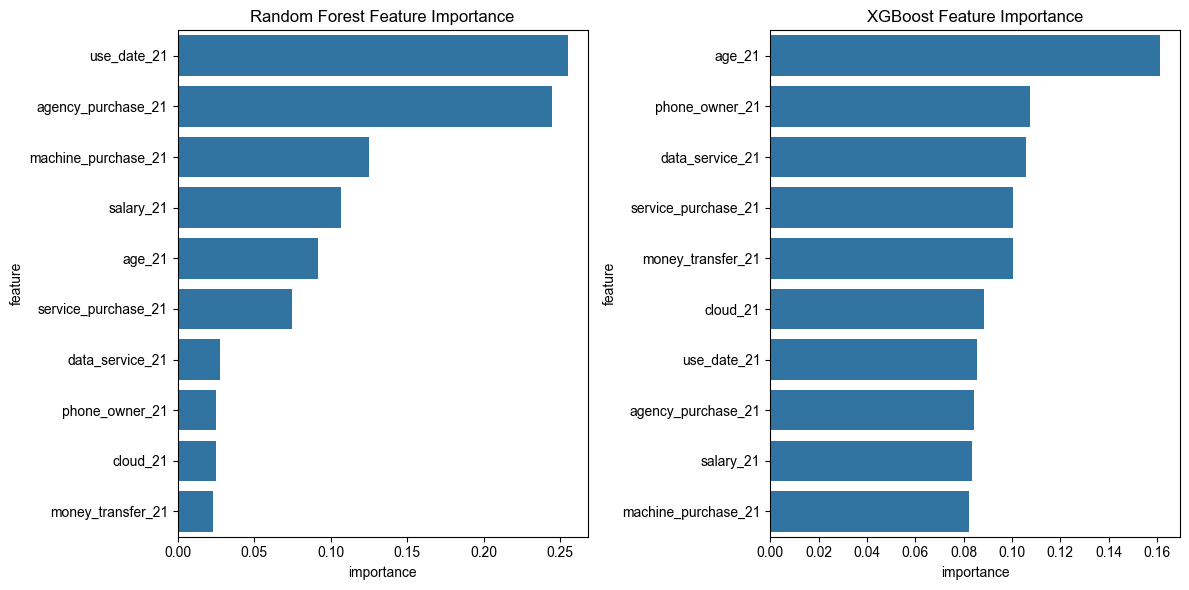

앙상블 모델 성능:               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1353
           1       0.25      0.01      0.02       112

    accuracy                           0.92      1465
   macro avg       0.59      0.50      0.49      1465
weighted avg       0.87      0.92      0.89      1465

앙상블 정확도: 0.9222


In [31]:
# 2022년도 이탈자에 대한 데이터 훈련 (랜덤포레스트 + XGBoost)

# 데이터 준비

# column 데이터
selected_features = [
    'machine_purchase_21',
    'agency_purchase_21',
    'data_service_21',
    'salary_21',
    'age_21',
    'cloud_21',
    'service_purchase_21',
    'use_date_21',
    'phone_owner_21',
    'money_transfer_21'
]


# 범주형 변수 전처리
le = LabelEncoder()
categorical_features = ['service_purchase_21', 'money_transfer_21']

# 범주형 변수 인코딩
for feature in categorical_features:
    phone_df[feature] = le.fit_transform(phone_df[feature].astype(str))

# 데이터 X, y
X = phone_df[selected_features]
y = (phone_df['brand_22'] != 1).astype(int)

# 데이터 훈련
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# XGBoost
xgb_clf = XGBClassifier(n_estimators=100, random_state=42)
xgb_clf.fit(X_train, y_train)

# 예측 및 평가
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_pred = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

print(f"Random Forest 성능: {classification_report(y_test, rf_pred)}")
print(f"Random Forest 정확도: {rf_accuracy:.4f}")

print(f"XGBoost 성능: {classification_report(y_test, xgb_pred)}")
print(f"XGBoost 정확도: {xgb_accuracy:.4f}")

# Random Forest 특성 중요도
plt.figure(figsize=(12, 6))
importance_rf = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_clf.feature_importances_
})
importance_rf = importance_rf.sort_values('importance', ascending=False)

plt.subplot(1, 2, 1)
sns.barplot(data=importance_rf, x='importance', y='feature')
plt.title('Random Forest Feature Importance')

# XGBoost 특성 중요도
importance_xgb = pd.DataFrame({
    'feature': selected_features,
    'importance': xgb_clf.feature_importances_
})
importance_xgb = importance_xgb.sort_values('importance', ascending=False)

plt.subplot(1, 2, 2)
sns.barplot(data=importance_xgb, x='importance', y='feature')
plt.title('XGBoost Feature Importance')


plt.tight_layout()
plt.show()

ensemble_pred = (rf_pred + xgb_pred) / 2
ensemble_pred = (ensemble_pred > 0.5).astype(int)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)


print(f"앙상블 모델 성능: {classification_report(y_test, ensemble_pred)}")

print(f"앙상블 정확도: {ensemble_accuracy:.4f}")

In [32]:
from sklearn.metrics import f1_score

# 모델 저장
import joblib

# Random Forest 모델 저장
joblib.dump(rf_clf, 'models/random_forest_model.joblib')
joblib.dump(xgb_clf, 'models/xgboost_model.joblib')

# 특성 중요도와 성능 지표 저장
import json
model_metrics = {
    'accuracy': rf_accuracy,
    'f1_score': f1_score(y_test, rf_pred),
    'feature_importance': rf_clf.feature_importances_.tolist(),
    'feature_names': selected_features
}

with open('models/rf_metrics.json', 'w') as f:
    json.dump(model_metrics, f)

xgb_model_metrics = {
    'accuracy': xgb_accuracy,
    'f1_score': f1_score(y_test, xgb_pred),
    'feature_importance': xgb_clf.feature_importances_.tolist(),
    'feature_names': selected_features
}

with open('models/xgb_metrics.json', 'w') as f:
    json.dump(xgb_model_metrics, f)

Random Forest 성능:               precision    recall  f1-score   support

           0       0.93      0.99      0.96      1353
           1       0.29      0.05      0.09       112

    accuracy                           0.92      1465
   macro avg       0.61      0.52      0.52      1465
weighted avg       0.88      0.92      0.89      1465

Random Forest 정확도: 0.9174
XGBoost 성능:               precision    recall  f1-score   support

           0       0.93      0.98      0.95      1353
           1       0.33      0.12      0.18       112

    accuracy                           0.91      1465
   macro avg       0.63      0.55      0.57      1465
weighted avg       0.88      0.91      0.90      1465

XGBoost 정확도: 0.9133


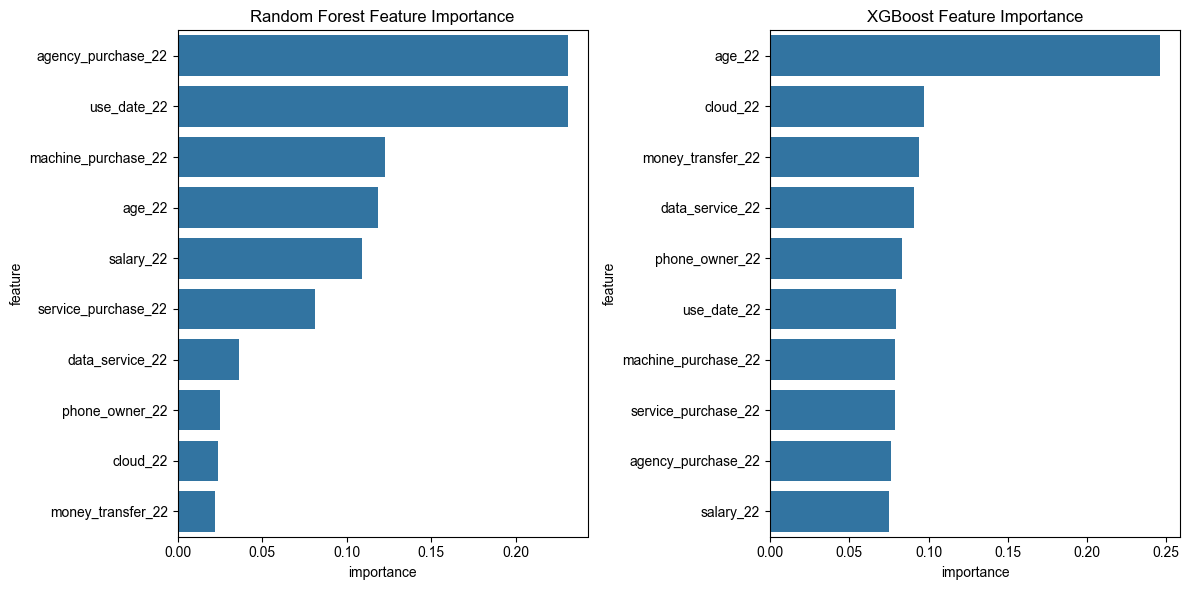

앙상블 모델 성능:               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1353
           1       0.55      0.05      0.10       112

    accuracy                           0.92      1465
   macro avg       0.74      0.52      0.53      1465
weighted avg       0.90      0.92      0.89      1465

앙상블 정확도: 0.9242


In [33]:
# 2023년도 이탈자에 대한 데이터 훈련

# 데이터 준비

# column 데이터
selected_features = [
    'machine_purchase_22',
    'agency_purchase_22',
    'data_service_22',
    'salary_22',
    'age_22',
    'cloud_22',
    'service_purchase_22',
    'use_date_22',
    'phone_owner_22',
    'money_transfer_22'
]


# 범주형 변수 전처리
le = LabelEncoder()
categorical_features = [
    'machine_purchase_22',
    'agency_purchase_22',
    'data_service_22',
    'use_date_22',
    'phone_owner_22',
    'service_purchase_22',
    'money_transfer_22'
]

# 범주형 변수 인코딩
for feature in categorical_features:
    phone_df[feature] = le.fit_transform(phone_df[feature].astype(str))

# 데이터 X, y
X = phone_df[selected_features]
y = (phone_df['brand_23'] != 1).astype(int)

# 데이터 훈련
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# XGBoost
xgb_clf = XGBClassifier(n_estimators=100, random_state=42)
xgb_clf.fit(X_train, y_train)

# 예측 및 평가
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_pred = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

print(f"Random Forest 성능: {classification_report(y_test, rf_pred)}")
print(f"Random Forest 정확도: {rf_accuracy:.4f}")

print(f"XGBoost 성능: {classification_report(y_test, xgb_pred)}")
print(f"XGBoost 정확도: {xgb_accuracy:.4f}")

# Random Forest 특성 중요도
plt.figure(figsize=(12, 6))
importance_rf = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_clf.feature_importances_
})
importance_rf = importance_rf.sort_values('importance', ascending=False)

plt.subplot(1, 2, 1)
sns.barplot(data=importance_rf, x='importance', y='feature')
plt.title('Random Forest Feature Importance')

# XGBoost 특성 중요도
importance_xgb = pd.DataFrame({
    'feature': selected_features,
    'importance': xgb_clf.feature_importances_
})
importance_xgb = importance_xgb.sort_values('importance', ascending=False)

plt.subplot(1, 2, 2)
sns.barplot(data=importance_xgb, x='importance', y='feature')
plt.title('XGBoost Feature Importance')


plt.tight_layout()
plt.show()

ensemble_pred = (rf_pred + xgb_pred) / 2
ensemble_pred = (ensemble_pred > 0.5).astype(int)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)


print(f"앙상블 모델 성능: {classification_report(y_test, ensemble_pred)}")
print(f"앙상블 정확도: {ensemble_accuracy:.4f}")

Decision Tree 성능:               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1353
           1       0.40      0.02      0.03       112

    accuracy                           0.92      1465
   macro avg       0.66      0.51      0.50      1465
weighted avg       0.88      0.92      0.89      1465

Decision Tree 정확도: 0.9229
XGBoost 성능:               precision    recall  f1-score   support

           0       0.92      0.99      0.96      1353
           1       0.14      0.02      0.03       112

    accuracy                           0.92      1465
   macro avg       0.53      0.50      0.49      1465
weighted avg       0.86      0.92      0.89      1465

XGBoost 정확도: 0.9167
앙상블 성능:              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1353
           1       0.00      0.00      0.00       112

    accuracy                           0.92      1465
   macro avg       0.46      0.50      0.48  

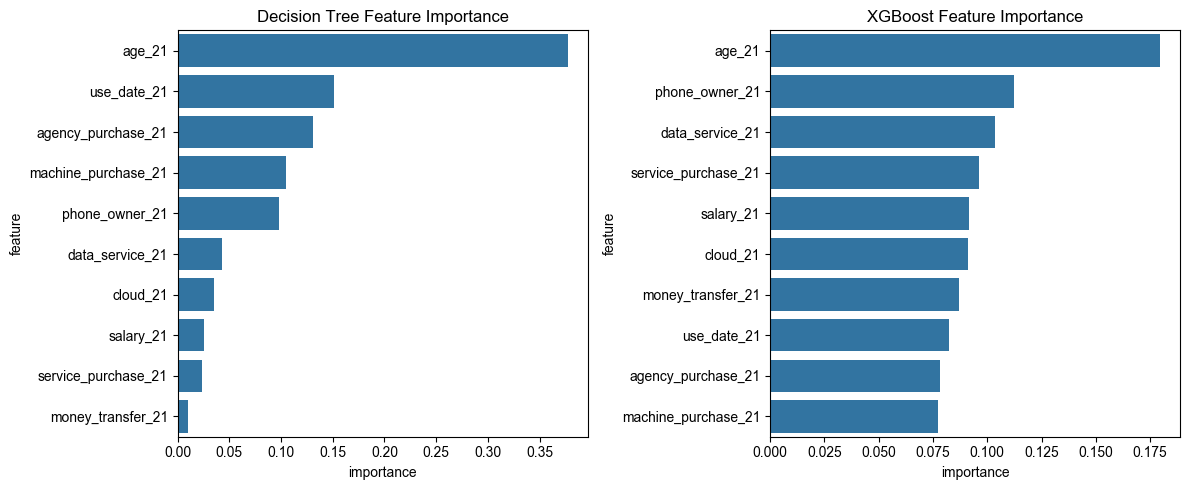

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# 2022년도 이탈자에 대한 데이터 훈련 (결정트리 + XGBoost)


# 데이터 준비
selected_features = [
    'machine_purchase_21', 'agency_purchase_21', 'data_service_21',
    'salary_21', 'age_21', 'cloud_21', 'service_purchase_21',
    'use_date_21', 'phone_owner_21', 'money_transfer_21'
]
le = LabelEncoder()
categorical_features = ['service_purchase_21', 'money_transfer_21']

for feature in categorical_features:
    phone_df[feature] = le.fit_transform(phone_df[feature].astype(str))

X = phone_df[selected_features]
y = (phone_df['brand_22'] != 1).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train, y_train)

xgb_clf = XGBClassifier(max_depth=5, random_state=42)
xgb_clf.fit(X_train, y_train)

dt_pred = dt_clf.predict(X_test)
xgb_pred = xgb_clf.predict(X_test)

ensemble_pred = ((dt_pred + xgb_pred) / 2 > 0.5).astype(int)

print(f"Decision Tree 성능: {classification_report(y_test, dt_pred)}")
print(f"Decision Tree 정확도: {accuracy_score(y_test, dt_pred):.4f}")

print(f"XGBoost 성능: {classification_report(y_test, xgb_pred)}")
print(f"XGBoost 정확도: {accuracy_score(y_test, xgb_pred):.4f}")

print(f"앙상블 성능:{classification_report(y_test, ensemble_pred)}")
print(f"앙상블 정확도: {accuracy_score(y_test, ensemble_pred):.4f}")

# 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
importance_dt = pd.DataFrame({
    'feature': selected_features,    
    'importance': dt_clf.feature_importances_
})
importance_dt = importance_dt.sort_values('importance', ascending=False)
sns.barplot(data=importance_dt, x='importance', y='feature')
plt.title('Decision Tree Feature Importance')

plt.subplot(1, 2, 2)
importance_xgb = pd.DataFrame({
    'feature': selected_features,
    'importance': xgb_clf.feature_importances_
})
importance_xgb = importance_xgb.sort_values('importance', ascending=False)
sns.barplot(data=importance_xgb, x='importance', y='feature')
plt.title('XGBoost Feature Importance')

plt.tight_layout()
plt.show()

Decision Tree 성능:               precision    recall  f1-score   support

           0       0.93      0.99      0.96      1353
           1       0.27      0.04      0.06       112

    accuracy                           0.92      1465
   macro avg       0.60      0.51      0.51      1465
weighted avg       0.88      0.92      0.89      1465

Decision Tree 정확도: 0.9188
XGBoost 성능:               precision    recall  f1-score   support

           0       0.93      0.98      0.95      1353
           1       0.21      0.06      0.10       112

    accuracy                           0.91      1465
   macro avg       0.57      0.52      0.52      1465
weighted avg       0.87      0.91      0.89      1465

XGBoost 정확도: 0.9099
앙상블 성능:              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1353
           1       0.44      0.04      0.07       112

    accuracy                           0.92      1465
   macro avg       0.69      0.52      0.51  

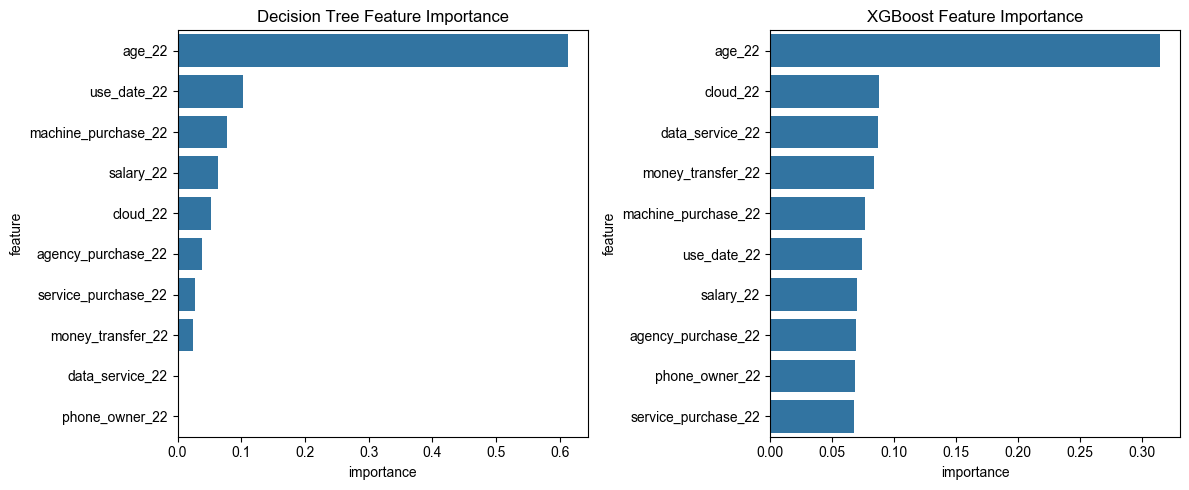

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# 2022년도 이탈자에 대한 데이터 훈련 (결정트리 + XGBoost)


# 데이터 준비
selected_features = [
    'machine_purchase_22', 'agency_purchase_22', 'data_service_22',
    'salary_22', 'age_22', 'cloud_22', 'service_purchase_22',
    'use_date_22', 'phone_owner_22', 'money_transfer_22'
]
le = LabelEncoder()
categorical_features = ['service_purchase_22', 'money_transfer_22', 'data_service_22', 
                         'use_date_22', 'phone_owner_22']

for feature in categorical_features:
    phone_df[feature] = le.fit_transform(phone_df[feature].astype(str))

X = phone_df[selected_features]
y = (phone_df['brand_23'] != 1).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train, y_train)

xgb_clf = XGBClassifier(max_depth=5, random_state=42)
xgb_clf.fit(X_train, y_train)

dt_pred = dt_clf.predict(X_test)
xgb_pred = xgb_clf.predict(X_test)

ensemble_pred = ((dt_pred + xgb_pred) / 2 > 0.5).astype(int)

print(f"Decision Tree 성능: {classification_report(y_test, dt_pred)}")
print(f"Decision Tree 정확도: {accuracy_score(y_test, dt_pred):.4f}")

print(f"XGBoost 성능: {classification_report(y_test, xgb_pred)}")
print(f"XGBoost 정확도: {accuracy_score(y_test, xgb_pred):.4f}")

print(f"앙상블 성능:{classification_report(y_test, ensemble_pred)}")
print(f"앙상블 정확도: {accuracy_score(y_test, ensemble_pred):.4f}")

# 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
importance_dt = pd.DataFrame({
    'feature': selected_features,    
    'importance': dt_clf.feature_importances_
})
importance_dt = importance_dt.sort_values('importance', ascending=False)
sns.barplot(data=importance_dt, x='importance', y='feature')
plt.title('Decision Tree Feature Importance')

plt.subplot(1, 2, 2)
importance_xgb = pd.DataFrame({
    'feature': selected_features,
    'importance': xgb_clf.feature_importances_
})
importance_xgb = importance_xgb.sort_values('importance', ascending=False)
sns.barplot(data=importance_xgb, x='importance', y='feature')
plt.title('XGBoost Feature Importance')

plt.tight_layout()
plt.show()

### 이탈자의 데이터가 현저하게 적기 때문에 데이터 훈련 시 적게 나오게된다

이탈자 데이터에서 소수 클래스(이탈자)의 성능을 높이기 위한 몇 가지 방법 적용
1. SMOTE(Synthetic Minority Over-sampling Technique) 사용
2. 클래스 가중치 적용
3. 결정 임계값 조정

In [36]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# 1. 데이터 준비
selected_features = [
    'machine_purchase_21',  
    'agency_purchase_21',    
    'salary_21',           
    'age_21',               
    'email_21',             
    'messenger_21',        
    'blog_21',              
    'cloud_21',             
    'call_check_21',        
    'voice_service_21',     
    'data_service_21',      
    'school_21',            
    'marry_21',             
    'job_21',               
    'religion_21'           
]

# NA 제거
df_clean = phone_df.dropna(subset=['brand_22'] + selected_features)

# 범주형 변수 인코딩
le = LabelEncoder()
categorical_features = [col for col in selected_features if df_clean[col].dtype == 'object']

for feature in categorical_features:
    df_clean[feature] = le.fit_transform(df_clean[feature].astype(str))

# 2. X, y 데이터 준비
X = df_clean[selected_features]
y = (df_clean['brand_22'] != 1).astype(int)

# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. SMOTE 적용
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# 5. 모델 학습
# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_balanced, y_train_balanced)

# XGBoost
xgb_model = XGBClassifier(max_depth=5, random_state=42)
xgb_model.fit(X_train_balanced, y_train_balanced)

# 6. 예측
dt_pred = dt_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# 앙상블 예측
ensemble_pred = ((dt_pred + xgb_pred) / 2 > 0.5).astype(int)

# 7. 성능 평가
print("SMOTE 적용 후 성능 평가")
print("\nDecision Tree 성능:")
print(classification_report(y_test, dt_pred))
print(f"Decision Tree 정확도: {accuracy_score(y_test, dt_pred):.4f}")

print("\nXGBoost 성능:")
print(classification_report(y_test, xgb_pred))
print(f"XGBoost 정확도: {accuracy_score(y_test, xgb_pred):.4f}")

print("\n앙상블 성능:")
print(classification_report(y_test, ensemble_pred))
print(f"앙상블 정확도: {accuracy_score(y_test, ensemble_pred):.4f}")

# 8. SMOTE 전후 클래스 분포 비교
print("\n클래스 분포 비교:")
print("원본 학습 데이터:", np.bincount(y_train))
print("SMOTE 적용 후:", np.bincount(y_train_balanced))

# 9. 특성 중요도 시각화
plt.figure(figsize=(12, 5))

SMOTE 적용 후 성능 평가

Decision Tree 성능:
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      1353
           1       0.13      0.36      0.19       112

    accuracy                           0.76      1465
   macro avg       0.53      0.58      0.52      1465
weighted avg       0.88      0.76      0.81      1465

Decision Tree 정확도: 0.7631

XGBoost 성능:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1353
           1       0.14      0.26      0.18       112

    accuracy                           0.82      1465
   macro avg       0.54      0.57      0.54      1465
weighted avg       0.87      0.82      0.85      1465

XGBoost 정확도: 0.8246

앙상블 성능:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1353
           1       0.17      0.20      0.18       112

    accuracy                           0.87      1465
   macro avg       0.55 

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

클래스 가중치: {np.int64(0): np.float64(0.5377202643171806), np.int64(1): np.float64(7.127737226277373)}

클래스 가중치 적용 후 성능 평가

Decision Tree 성능:
              precision    recall  f1-score   support

           0       0.95      0.73      0.83      1353
           1       0.14      0.54      0.22       112

    accuracy                           0.72      1465
   macro avg       0.55      0.63      0.53      1465
weighted avg       0.89      0.72      0.78      1465

Decision Tree 정확도: 0.7160

XGBoost 성능:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1353
           1       0.16      0.37      0.22       112

    accuracy                           0.81      1465
   macro avg       0.55      0.60      0.56      1465
weighted avg       0.88      0.81      0.84      1465

XGBoost 정확도: 0.8055

앙상블 성능:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1353
           1       0.18      0.

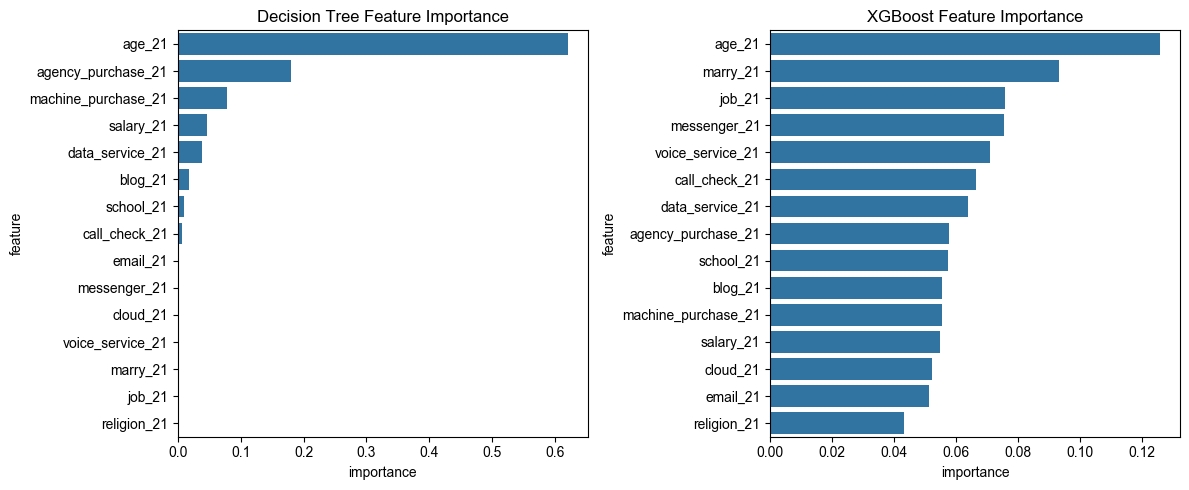

In [37]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight

# 1. 데이터 준비
selected_features = [
    'machine_purchase_21',  
    'agency_purchase_21',    
    'salary_21',           
    'age_21',               
    'email_21',             
    'messenger_21',        
    'blog_21',              
    'cloud_21',             
    'call_check_21',        
    'voice_service_21',     
    'data_service_21',      
    'school_21',            
    'marry_21',             
    'job_21',               
    'religion_21'           
]

# NA 제거
df_clean = phone_df.dropna(subset=['brand_22'] + selected_features)

# 범주형 변수 인코딩
le = LabelEncoder()
categorical_features = [col for col in selected_features if df_clean[col].dtype == 'object']

for feature in categorical_features:
    df_clean[feature] = le.fit_transform(df_clean[feature].astype(str))

# 2. X, y 데이터 준비
X = df_clean[selected_features]
y = (df_clean['brand_22'] != 1).astype(int)

# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 클래스 가중치 계산
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

print("클래스 가중치:", class_weight_dict)

# 5. 모델 학습 (가중치 적용)
# Decision Tree with class weights
dt_model = DecisionTreeClassifier(
    max_depth=5, 
    random_state=42,
    class_weight=class_weight_dict
)
dt_model.fit(X_train, y_train)

# XGBoost with scale_pos_weight
scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])
xgb_model = XGBClassifier(
    max_depth=5, 
    random_state=42,
    scale_pos_weight=scale_pos_weight
)
xgb_model.fit(X_train, y_train)

# 6. 예측
dt_pred = dt_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# 앙상블 예측
ensemble_pred = ((dt_pred + xgb_pred) / 2 > 0.5).astype(int)

# 7. 성능 평가
print("\n클래스 가중치 적용 후 성능 평가")
print("\nDecision Tree 성능:")
print(classification_report(y_test, dt_pred))
print(f"Decision Tree 정확도: {accuracy_score(y_test, dt_pred):.4f}")

print("\nXGBoost 성능:")
print(classification_report(y_test, xgb_pred))
print(f"XGBoost 정확도: {accuracy_score(y_test, xgb_pred):.4f}")

print("\n앙상블 성능:")
print(classification_report(y_test, ensemble_pred))
print(f"앙상블 정확도: {accuracy_score(y_test, ensemble_pred):.4f}")

# 8. 클래스 분포 확인
print("\n클래스 분포:")
print("학습 데이터:", np.bincount(y_train))
print("테스트 데이터:", np.bincount(y_test))

# 9. 특성 중요도 시각화
plt.figure(figsize=(12, 5))

# Decision Tree 특성 중요도
plt.subplot(1, 2, 1)
importance_dt = pd.DataFrame({
    'feature': selected_features,
    'importance': dt_model.feature_importances_
})
importance_dt = importance_dt.sort_values('importance', ascending=False)
sns.barplot(data=importance_dt, x='importance', y='feature')
plt.title('Decision Tree Feature Importance')

# XGBoost 특성 중요도
plt.subplot(1, 2, 2)
importance_xgb = pd.DataFrame({
    'feature': selected_features,
    'importance': xgb_model.feature_importances_
})
importance_xgb = importance_xgb.sort_values('importance', ascending=False)
sns.barplot(data=importance_xgb, x='importance', y='feature')
plt.title('XGBoost Feature Importance')

plt.tight_layout()
plt.show()


임곗값 0.3일 때의 결과:

Decision Tree (threshold=0.3):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1353
           1       0.14      0.05      0.08       112

    accuracy                           0.90      1465
   macro avg       0.53      0.51      0.51      1465
weighted avg       0.87      0.90      0.88      1465


XGBoost (threshold=0.3):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1353
           1       0.29      0.02      0.03       112

    accuracy                           0.92      1465
   macro avg       0.61      0.51      0.50      1465
weighted avg       0.88      0.92      0.89      1465


앙상블 (threshold=0.3):
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1353
           1       0.09      0.02      0.03       112

    accuracy                           0.91      1465
   macro avg       0.51      0.

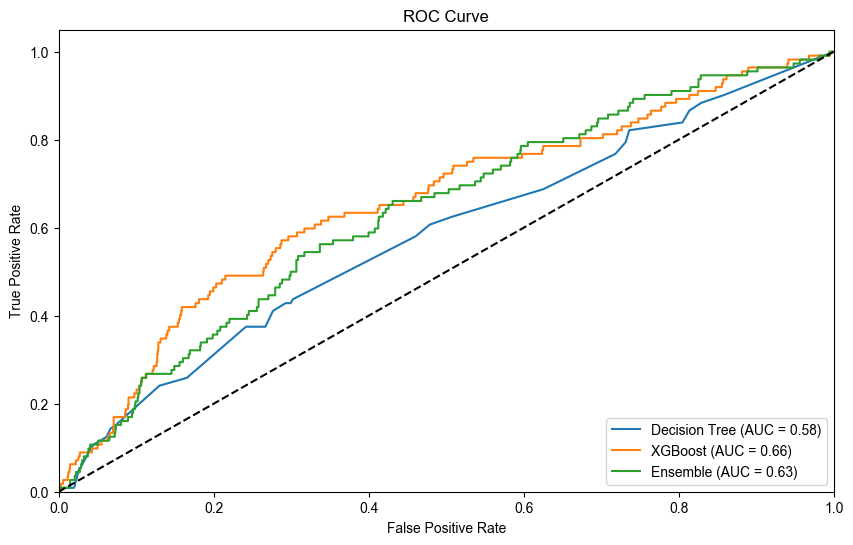

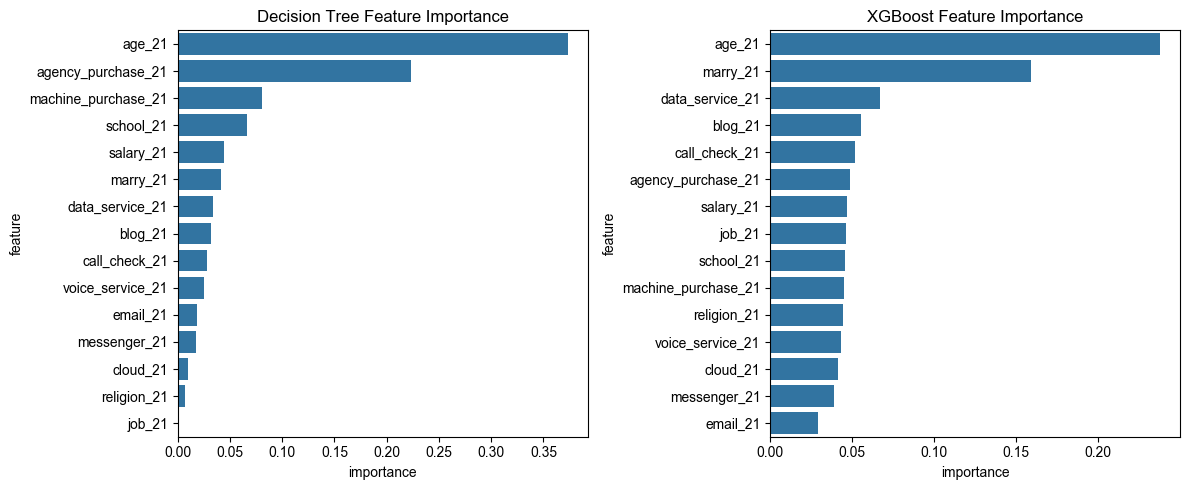

In [38]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 준비
selected_features = [
    'machine_purchase_21',  
    'agency_purchase_21',    
    'salary_21',           
    'age_21',               
    'email_21',             
    'messenger_21',        
    'blog_21',              
    'cloud_21',             
    'call_check_21',        
    'voice_service_21',     
    'data_service_21',      
    'school_21',            
    'marry_21',             
    'job_21',               
    'religion_21'           
]

# 범주형 변수 인코딩
le = LabelEncoder()
categorical_features = [col for col in selected_features if df_clean[col].dtype == 'object']

for feature in categorical_features:
    df_clean[feature] = le.fit_transform(df_clean[feature].astype(str))

# 2. X, y 데이터 준비
X = df_clean[selected_features]
y = (df_clean['brand_22'] != 1).astype(int)

# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 최적화된 모델 파라미터로 모델 정의
dt_model = DecisionTreeClassifier(
    max_depth=7,              # 트리 깊이 증가
    min_samples_split=10,     # 분할을 위한 최소 샘플 수
    min_samples_leaf=5,       # 리프 노드의 최소 샘플 수
    criterion='entropy',      # 정보 이득 기준
    random_state=42
)

xgb_model = XGBClassifier(
    max_depth=6,              # 트리 깊이
    learning_rate=0.01,       # 학습률 감소
    n_estimators=200,         # 트리 개수 증가
    min_child_weight=3,       # 과적합 방지
    subsample=0.8,            # 샘플링 비율
    colsample_bytree=0.8,     # 특성 샘플링
    random_state=42
)

# 5. 모델 학습
dt_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# 6. 예측 확률 계산
dt_proba = dt_model.predict_proba(X_test)
xgb_proba = xgb_model.predict_proba(X_test)

# 7. 다양한 임곗값에 대한 결과 비교
thresholds = [0.3, 0.4, 0.5]
for threshold in thresholds:
    print(f"\n임곗값 {threshold}일 때의 결과:")
    
    # Decision Tree 예측
    dt_pred = (dt_proba[:, 1] > threshold).astype(int)
    print(f"\nDecision Tree (threshold={threshold}):")
    print(classification_report(y_test, dt_pred, zero_division=0))
    
    # XGBoost 예측
    xgb_pred = (xgb_proba[:, 1] > threshold).astype(int)
    print(f"\nXGBoost (threshold={threshold}):")
    print(classification_report(y_test, xgb_pred, zero_division=0))
    
    # 앙상블 예측
    ensemble_proba = (dt_proba[:, 1] + xgb_proba[:, 1]) / 2
    ensemble_pred = (ensemble_proba > threshold).astype(int)
    print(f"\n앙상블 (threshold={threshold}):")
    print(classification_report(y_test, ensemble_pred, zero_division=0))

# 8. ROC 커브 시각화
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(10, 6))

# Decision Tree ROC
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_proba[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# XGBoost ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

# 앙상블 ROC
ensemble_proba = (dt_proba[:, 1] + xgb_proba[:, 1]) / 2
fpr_ens, tpr_ens, _ = roc_curve(y_test, ensemble_proba)
roc_auc_ens = auc(fpr_ens, tpr_ens)
plt.plot(fpr_ens, tpr_ens, label=f'Ensemble (AUC = {roc_auc_ens:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 9. 특성 중요도 시각화
plt.figure(figsize=(12, 5))

# Decision Tree 특성 중요도
plt.subplot(1, 2, 1)
importance_dt = pd.DataFrame({
    'feature': selected_features,
    'importance': dt_model.feature_importances_
})
importance_dt = importance_dt.sort_values('importance', ascending=False)
sns.barplot(data=importance_dt, x='importance', y='feature')
plt.title('Decision Tree Feature Importance')

# XGBoost 특성 중요도
plt.subplot(1, 2, 2)
importance_xgb = pd.DataFrame({
    'feature': selected_features,
    'importance': xgb_model.feature_importances_
})
importance_xgb = importance_xgb.sort_values('importance', ascending=False)
sns.barplot(data=importance_xgb, x='importance', y='feature')
plt.title('XGBoost Feature Importance')

plt.tight_layout()
plt.show()

In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# 클래스 가중치 계산
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# 모델 정의
dt_model = DecisionTreeClassifier(
    max_depth=4,
    min_samples_leaf=5,
    random_state=42,
    class_weight=class_weight_dict
)

xgb_model = XGBClassifier(
    max_depth=4,
    learning_rate=0.1,
    n_estimators=200,
    scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1])
)

# 모델 학습
dt_model.fit(X_train_balanced, y_train_balanced)
xgb_model.fit(X_train_balanced, y_train_balanced)

# 예측 확률 계산
dt_proba = dt_model.predict_proba(X_test)
xgb_proba = xgb_model.predict_proba(X_test)

# 임곗값 조정
threshold = 0.3
dt_pred = (dt_proba[:, 1] > threshold).astype(int)
xgb_pred = (xgb_proba[:, 1] > threshold).astype(int)
ensemble_pred = ((dt_pred + xgb_pred) / 2 > 0.5).astype(int)

# 성능 평가
print("Decision Tree 성능:")
print(classification_report(y_test, dt_pred))

print("\nXGBoost 성능:")
print(classification_report(y_test, xgb_pred))

print("\n앙상블 성능:")
print(classification_report(y_test, ensemble_pred))

Decision Tree 성능:
              precision    recall  f1-score   support

           0       0.95      0.03      0.06      1353
           1       0.08      0.98      0.14       112

    accuracy                           0.10      1465
   macro avg       0.52      0.51      0.10      1465
weighted avg       0.89      0.10      0.07      1465


XGBoost 성능:
              precision    recall  f1-score   support

           0       0.96      0.36      0.52      1353
           1       0.09      0.81      0.17       112

    accuracy                           0.39      1465
   macro avg       0.53      0.59      0.35      1465
weighted avg       0.89      0.39      0.50      1465


앙상블 성능:
              precision    recall  f1-score   support

           0       0.96      0.36      0.53      1353
           1       0.10      0.81      0.17       112

    accuracy                           0.40      1465
   macro avg       0.53      0.59      0.35      1465
weighted avg       0.89      0.40 

In [40]:
# 2022년도 이탈자에 대한 데이터 훈련 (랜덤포레스트 + XGBoost)

# 데이터 준비
# column 데이터
selected_features = [col for col in phone_df.columns if col.endswith('_21')]

# 각 컬럼별로 데이터 타입 변환
for column in X.columns:
    if X[column].dtype == 'object':  # 문자열 데이터인 경우
        X[column] = le.fit_transform(X[column].astype(str))
    else:  # 숫자형 데이터인 경우
        X[column] = pd.to_numeric(X.loc[:, column], errors='coerce')

# 결측치가 있다면 제거
X = X.dropna()
y = (df_clean.loc[X.index, 'brand_22'] != 1).astype(int)

# 데이터 훈련
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# XGBoost
xgb_clf = XGBClassifier(n_estimators=100, random_state=42)
xgb_clf.fit(X_train, y_train)

# 예측 및 평가
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_pred = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

print(f"Random Forest 성능: {classification_report(y_test, rf_pred)}")
print(f"Random Forest 정확도: {rf_accuracy:.4f}")

print(f"XGBoost 성능: {classification_report(y_test, xgb_pred)}")
print(f"XGBoost 정확도: {xgb_accuracy:.4f}")

# Random Forest 특성 중요도
plt.figure(figsize=(12, 6))
importance_rf = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_clf.feature_importances_
})
importance_rf = importance_rf.sort_values('importance', ascending=False)

plt.subplot(1, 2, 1)
sns.barplot(data=importance_rf, x='importance', y='feature')
plt.title('Random Forest Feature Importance')

# XGBoost 특성 중요도
importance_xgb = pd.DataFrame({
    'feature': selected_features,
    'importance': xgb_clf.feature_importances_
})
importance_xgb = importance_xgb.sort_values('importance', ascending=False)

plt.subplot(1, 2, 2)
sns.barplot(data=importance_xgb, x='importance', y='feature')
plt.title('XGBoost Feature Importance')


plt.tight_layout()
plt.show()

ensemble_pred = (rf_pred + xgb_pred) / 2
ensemble_pred = (ensemble_pred > 0.5).astype(int)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)


print(f"앙상블 모델 성능: {classification_report(y_test, ensemble_pred)}")
print(f"앙상블 정확도: {ensemble_accuracy:.4f}")

/var/folders/kp/5_0zhw410tzf9tkb2lt76sw40000gn/T/ipykernel_45162/139995903.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = pd.to_numeric(X.loc[:, column], errors='coerce')


Random Forest 성능:               precision    recall  f1-score   support

           0       0.92      0.99      0.96      1353
           1       0.12      0.02      0.03       112

    accuracy                           0.91      1465
   macro avg       0.52      0.50      0.49      1465
weighted avg       0.86      0.91      0.88      1465

Random Forest 정확도: 0.9147
XGBoost 성능:               precision    recall  f1-score   support

           0       0.92      0.99      0.96      1353
           1       0.18      0.03      0.05       112

    accuracy                           0.92      1465
   macro avg       0.55      0.51      0.50      1465
weighted avg       0.87      0.92      0.89      1465

XGBoost 정확도: 0.9160


ValueError: All arrays must be of the same length

<Figure size 1200x600 with 0 Axes>

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from imblearn.combine import SMOTETomek
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

class ChurnPredictor:
    def __init__(self, df, target_year):
        self.df = df
        self.target_year = target_year
        self.base_year = target_year - 1
        self.le = LabelEncoder()
        self.scaler = StandardScaler()
        
    def preprocess_data(self):
        """데이터 전처리"""
        # 1. 초기 특성 선택
        self.features = [col for col in self.df.columns if str(self.base_year) in col]
        df_clean = self.df.copy()
        
        # 2. 결측치 처리
        for col in self.features:
            if df_clean[col].dtype in ['int64', 'float64']:
                df_clean[col].fillna(df_clean[col].mean(), inplace=True)
            else:
                df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
        
        # 3. 특성 엔지니어링
        # 가격 관련 특성
        df_clean[f'price_to_income_{self.base_year}'] = (
            df_clean[f'machine_purchase_{self.base_year}'] / 
            df_clean[f'salary_{self.base_year}']
        )
        df_clean[f'total_cost_{self.base_year}'] = (
            df_clean[f'machine_purchase_{self.base_year}'] + 
            df_clean[f'agency_purchase_{self.base_year}']
        )
        
        # 서비스 활용도 점수
        service_cols = [col for col in self.features if 'service' in col]
        df_clean[f'service_usage_score_{self.base_year}'] = df_clean[service_cols].sum(axis=1)
        
        # 4. 범주형 변수 인코딩
        for col in self.features:
            if df_clean[col].dtype == 'object':
                df_clean[col] = self.le.fit_transform(df_clean[col].astype(str))
        
        # 5. 특성 스케일링
        numeric_cols = df_clean[self.features].select_dtypes(include=['int64', 'float64']).columns
        df_clean[numeric_cols] = self.scaler.fit_transform(df_clean[numeric_cols])
        
        return df_clean
    
    def prepare_xy(self, df_clean):
        """X, y 데이터 준비"""
        X = df_clean[self.features]
        y = (df_clean[f'brand_{self.target_year}'] != 1).astype(int)
        return X, y
    
    def balance_dataset(self, X, y):
        """데이터 불균형 해결"""
        smote_tomek = SMOTETomek(random_state=42)
        return smote_tomek.fit_resample(X, y)
    
    def select_features(self, X, y):
        """중요 특성 선택"""
        selector = SelectFromModel(
            RandomForestClassifier(n_estimators=100, random_state=42),
            max_features=20
        )
        selector.fit(X, y)
        X_selected = selector.transform(X)
        selected_features = X.columns[selector.get_support()].tolist()
        return X_selected, selected_features
    
    def create_ensemble(self):
        """앙상블 모델 생성"""
        rf = RandomForestClassifier(
            n_estimators=200,
            max_depth=7,
            min_samples_leaf=10,
            class_weight='balanced',
            random_state=42
        )
        
        xgb = XGBClassifier(
            n_estimators=200,
            max_depth=5,
            learning_rate=0.01,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42
        )
        
        lgb = LGBMClassifier(
            n_estimators=200,
            max_depth=5,
            learning_rate=0.01,
            subsample=0.8,
            random_state=42
        )
        
        return VotingClassifier(
            estimators=[
                ('rf', rf),
                ('xgb', xgb),
                ('lgb', lgb)
            ],
            voting='soft'
        )
    
    def train_and_evaluate(self):
        """전체 훈련 및 평가 프로세스"""
        # 1. 데이터 전처리
        print("데이터 전처리 중...")
        df_clean = self.preprocess_data()
        X, y = self.prepare_xy(df_clean)
        
        # 2. 데이터 분할
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        
        # 3. 데이터 불균형 해결
        print("데이터 불균형 처리 중...")
        X_train_balanced, y_train_balanced = self.balance_dataset(X_train, y_train)
        
        # 4. 특성 선택
        print("중요 특성 선택 중...")
        X_train_selected, selected_features = self.select_features(X_train_balanced, y_train_balanced)
        X_test_selected = X_test[selected_features]
        
        # 5. 모델 생성 및 학습
        print("모델 학습 중...")
        model = self.create_ensemble()
        model.fit(X_train_selected, y_train_balanced)
        
        # 6. 예측 및 평가
        print("\n다양한 임계값에서의 성능 평가:")
        y_pred_proba = model.predict_proba(X_test_selected)
        
        thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
        best_threshold = 0
        best_f1 = 0
        
        for threshold in thresholds:
            y_pred = (y_pred_proba[:, 1] > threshold).astype(int)
            report = classification_report(y_test, y_pred, output_dict=True)
            f1 = report['1']['f1-score']  # 이탈자 클래스의 F1 score
            
            print(f"\nThreshold: {threshold}")
            print(classification_report(y_test, y_pred))
            
            if f1 > best_f1:
                best_f1 = f1
                best_threshold = threshold
        
        print(f"\n최적 임계값: {best_threshold} (F1-score: {best_f1:.4f})")
        
        # 7. 특성 중요도 시각화
        plt.figure(figsize=(12, 6))
        importance = pd.DataFrame({
            'feature': selected_features,
            'importance': model.named_estimators_['rf'].feature_importances_
        })
        importance = importance.sort_values('importance', ascending=False)
        
        sns.barplot(data=importance, x='importance', y='feature')
        plt.title('Feature Importance')
        plt.tight_layout()
        plt.show()
        
        return model, best_threshold, selected_features

# 모델 실행
predictor = ChurnPredictor(phone_df, target_year=22)
model, best_threshold, selected_features = predictor.train_and_evaluate()

# 2023년 예측도 실행
predictor_2023 = ChurnPredictor(phone_df, target_year=23)
model_2023, best_threshold_2023, selected_features_2023 = predictor_2023.train_and_evaluate()

NameError: name 'phone_df' is not defined

In [ ]:
# 수연이 누나 코드
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import xgboost as xgb
import pandas as pd

selected_features = [
    'email_21', 'messenger_21', 'blog_21', 'cloud_21',
    'call_check_21', 'service_purchase_21', 'money_transfer_21',
    'cradit_card_21', 'agency_purchase_21', 'machine_purchase_21',
    'phone_owner_21', 'data_21', 'dmb_21', 'agency_21', 'voice_service_21',
    'data_service_21', 'use_date_21', 'brand_21', 'age_21', 'school_21',
    'marry_21', 'salary_21', 'job_21', 'religion_21'  
]


# 데이터 X, y
X = phone_df[selected_features]
y = (phone_df['brand_22'] != 1).astype(int)

# 연속형 변수
continuous_features = [
    'agency_purchase_21', 'machine_purchase_21',
    'use_date_21', 'salary_21'
]

# 데이터 준비: train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ColumnTransformer로 스케일링 처리
scaler = StandardScaler()
transformer = ColumnTransformer([
    ('scaler', scaler, continuous_features)
], remainder='passthrough')

# 학습 데이터 스케일링
X_train_scaled = transformer.fit_transform(X_train)
X_test_scaled = transformer.transform(X_test)

# SMOTE 적용 (오버샘플링)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# XGBoost 모델 설정
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=20,  # 불균형 해결을 위한 가중치 조정
    random_state=42
)

# XGBoost의 하이퍼파라미터 후보들
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'scale_pos_weight': [10, 20, 30]  # 불균형 데이터에 맞춘 가중치
}

# 랜덤 서치
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,  # 시도할 하이퍼파라미터 조합 수
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    random_state=42
)

# 학습
random_search.fit(X_train_resampled, y_train_resampled, early_stopping_rounds=10, eval_metric="logloss", eval_set=[(X_test_scaled, y_test)])

# 최적 파라미터
print("Best parameters found: ", random_search.best_params_)

# 최적 모델로 예측
y_pred = random_search.best_estimator_.predict(X_test_scaled)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)